# **<u>Part 2</u>:** Object-oriented programming in Python

### Object-Oriented Programming (OOP) refers to a programming paradigm 
### that organizes code around objects rather than functions or logic. 
### These objects represent real-world entities by bundling data (attributes)
### and behavior (methods) into a single unit.

### 

### In other words: OOP provides a structured and intuitive way to design 
### programs by modeling objects and the interactions between them. 
### It encourages clean, modular, and reusable code.

### 

### Object-Oriented Programming emphasizes:

### 

### **Encapsulation**: Bundling data and behavior together, while controlling access to internal details.
### **Abstraction**: Hiding complexity by exposing only the essential features of an object.
### **Inheritance**: Reusing and extending existing code by creating specialized classes.
### **Polymorphism**: Designing code that works seamlessly with different object types.

### 

### Here an inspirational quote: 
### 
### "Any fool can write code that a computer can understand.
### Good programmers write code that humans can understand."
### $\qquad$ – Martin Fowler

### 

### 
<hr style="border:1px solid blue">

### 
# <u>Lesson 1</u>: A wrap-up of the basics of OOP.
### 
## <u>Task</u>: Give a Python implementation for the evaluation of
## (the derivatives of) polynomials (we don't use numpy).
### 
### We start with a procedural / functional implementation:

In [ ]:
""" [IMPORT] - for type hinting """
from typing import Sequence


""" [FOCUS] - procedural implementation """
# Note that this is not the most efficient method to evaluate a polynomial
# See Horner's method: https://en.wikipedia.org/wiki/Horner%27s_method
def evaluate_polynomial(weights: Sequence[float | int], x: int | float, dx: int = 0) -> float:
  """
      Function for evaluating a polynomial or one of its derivatives.

      Parameters
      ----------
      weights : `Sequence[float, int]`
          Sequence containing the polynomial weights.
          The polynomial's order follows from the sequence's length.
      x : `float, int`
          Point to evaluate the polynomial in.
      dx : `int`
          Derivative to evaluate. It has to hold dx >= 0.

      Returns
      -------
      ret : `float`
          The polynomial's evaluation.
  """
  if dx == 0:
    return sum(a * x**i for i, a in enumerate(weights))
  return evaluate_polynomial([a * i for i, a in enumerate(weights[1:], 1)], x, dx=dx-1)  # avoid redundant else


""" [HELPER] - validate """
print("2x^2 + x + 1 in x = 5: ", evaluate_polynomial([1, 1, 2], 5, dx=0), '\n')
print("d/dx (2x^2 + x + 1) in x = 5: ", evaluate_polynomial([1, 1, 2], 5, dx=1), '\n')
print("d/dx d/dx (2x^2 + x + 1) in x = 5: ", evaluate_polynomial([1, 1, 2], 5, dx=2), '\n')
print("d/dx d/dx d/dx (2x^2 + x + 1) in x = 5: ", evaluate_polynomial([1, 1, 2], 5, dx=3))

### 
### However, a polynomial is a particular **>>class<<** of function.
### To highlight the differences between procedural and OOP, we now represent
### a polynomial as a class:

In [ ]:
""" [IMPORT] - for type hinting """
from typing import Sequence


""" [FOCUS] - class implementation, derivative missing """
class Polynomial:
    
  def __init__(self, weights: Sequence[float | int]) -> None:
    self.weights = weights

  def evaluate(self, x: int | float) -> float:
    return sum(a * x**i for i, a in enumerate(self.weights))

  # we may implement a string formatter
  # this guy tells python how to format a Polynomial
  # in, for instance, a print statement.
  def __repr__(self) -> str:
    ret = ' + '.join(reversed([f'{a}x^{i}' for i, a in enumerate(self.weights) if a]))\
               .replace('x^0', '') \
               .replace(' 1x', ' x')\
               .replace('+ -', '- ')
    if not ret: return '0'
    return ret

  # if the class does not implement __str__ (only __repr__),
  # which determines the behaviour when we invoke str(pol),
  # python will automatically set __str__ = __repr__


""" [HELPER] - validate """
pol = Polynomial([1, 1, 2])

print('Using `pol` in a print statement directly gives:', pol, '\n')

# a formatted f'...' string replaces {pol} by str(pol)
print(f'Using `pol` in a formatted string gives: {pol}.\n')

print(f'{pol} in x = 5: equals', pol.evaluate(5))

### 
### We can't take derivatives yet, so let's implement that now.
### 
### For incrementally building classes, we introduce the `[NEW]` tag to mark
### member functions that didn't yet exist in the previous cell or have changed.
### 

In [ ]:
""" [IMPORT] - for type hinting """
from typing import Sequence


""" [FOCUS] """
class Polynomial:

  def __init__(self, weights: Sequence[float | int]) -> None:
    self.weights = weights

  def evaluate(self, x: int | float) -> float:
    return sum(a * x**i for i, a in enumerate(self.weights))

  def __repr__(self) -> str:
    ret = ' + '.join(reversed([f'{a}x^{i}' for i, a in enumerate(self.weights) if a]))\
               .replace('x^0', '') \
               .replace(' 1x', ' x')\
               .replace('+ -', '- ')
    if not ret: return '0'
    return ret
  
  """ [NEW] - first order derivative """
  def _deriv(self) -> 'Polynomial':
    # create new weights as in the procedural implementation
    return Polynomial([a * i for i, a in enumerate(self.weights[1:], 1)])
  
  """ [NEW] - n-th order derivative """
  def derivative(self, n: int = 1) -> 'Polynomial':
    if n == 0: return self
    return self._deriv().derivative(n-1)
    

""" [HELPER] - validate """
pol = Polynomial([1, 1, 2])
print(f'{pol} in x = 5 equals: ', pol.evaluate(5), '\n')
print(f'd/dx ({pol}) in x = 5 equals: ', pol.derivative().evaluate(5), '\n')
print(f'd/dx d/dx ({pol}) in x = 5 equals: ', pol.derivative(2).evaluate(5), '\n')
print(f'd/dx d/dx d/dx ({pol}) in x = 5 equals: ', pol.derivative(3).evaluate(5))

### 
<hr style="border:1px solid blue">

### 

### This `.evaluate` thing is kinda stupid.
### It would feel more natural to simply call the polynomial, i.e., pol(5)

### 
### We can implement the `__call__` so-called _'dunder'_ method to achieve exactly that:

In [ ]:
""" [IMPORT] - for type hinting """
from typing import Sequence

    
""" [FOCUS] """
class Polynomial:

  def __init__(self, weights: Sequence[float | int]) -> None:
    self.weights = weights

  """ [NEW] - different name """
  def __call__(self, x: int | float) -> float:
    return sum(a * x**i for i, a in enumerate(self.weights))

  def __repr__(self) -> str:
    ret = ' + '.join(reversed([f'{a}x^{i}' for i, a in enumerate(self.weights) if a]))\
               .replace('x^0', '') \
               .replace(' 1x', ' x')\
               .replace('+ -', '- ')
    if not ret: return '0'
    return ret

  def _deriv(self) -> 'Polynomial':
    return Polynomial([a * i for i, a in enumerate(self.weights[1:], 1)])

  def derivative(self, n: int = 1) -> 'Polynomial':
    if n == 0: return self
    return self._deriv().derivative(n-1)
    

""" [HELPER] - validate """
pol = Polynomial([1, 1, 2])
print(f'{pol} in x = 5: ', pol(5), '\n')
print(f'd/dx ({pol}) in x = 5 equals: ', pol.derivative()(5), '\n')
print(f'd/dx d/dx ({pol}) in x = 5 equals: ', pol.derivative(2)(5), '\n')
print(f'd/dx d/dx d/dx ({pol}) in x = 5 equals: ', pol.derivative(3)(5))

### 
<hr style="border:1px solid blue">

### 
## <u>Exercise 1.1</u>
### Use the `__add__(self, other)` dunder method in combination with `itertools.zip_longest`
### and `__mul__(self, other)` in combination with `more_itertools.convolve`
### to implement the addition and multiplication of two polynomials.

In [ ]:
""" [IMPORT] - zip_longest, convolve """
from typing import Sequence
from itertools import zip_longest
from more_itertools import convolve


""" [FOCUS] """
class Polynomial:

  def __init__(self, weights: Sequence[float | int]) -> None:
    self.weights = weights

  def __call__(self, x: int | float) -> float:
    return sum(a * x**i for i, a in enumerate(self.weights))
  
  def _deriv(self) -> 'Polynomial':
    return Polynomial([a * i for i, a in enumerate(self.weights[1:], 1)])
  
  def derivative(self, n: int = 1) -> 'Polynomial':
    if n == 0: return self
    return self._deriv().derivative(n-1)

  def __repr__(self) -> str:
    ret = ' + '.join(reversed([f'{a}x^{i}' for i, a in enumerate(self.weights) if a]))\
               .replace('x^0', '') \
               .replace(' 1x', ' x')\
               .replace('+ -', '- ')
    if not ret: return '0'
    return ret

  """ [NEW] - your code here """
  def __add__(self, other: 'Polynomial') -> 'Polynomial':
    return # your code here

  def __mul__(self, other: 'Polynomial') -> 'Polynomial':
    return # your code here
  """ [/NEW] """
    

""" [SETUP] - make two polynomials """
pol0 = Polynomial([1, 2, 3])
pol1 = Polynomial([0, 4, 3, 2])


""" [HELPER] - validate """
print(f"({pol0}) + ({pol1}) = {pol0 + pol1}.")
print(f"({pol0}) + ({pol1}) + ({pol1}) = {pol0 + pol1 + pol1}.")
print(f"({pol0}) x ({pol1}) = {pol0 * pol1}.")

### solution:

In [ ]:
""" [IMPORT] - zip_longest, convolve """
from typing import Sequence
from itertools import zip_longest
from more_itertools import convolve


""" [FOCUS] """
class Polynomial:

  def __init__(self, weights: Sequence[float | int]) -> None:
    self.weights = weights

  def __call__(self, x: int | float) -> float:
    return sum(a * x**i for i, a in enumerate(self.weights))
  
  def _deriv(self) -> 'Polynomial':
    return Polynomial([a * i for i, a in enumerate(self.weights[1:], 1)])
  
  def derivative(self, n: int = 1) -> 'Polynomial':
    if n == 0: return self
    return self._deriv().derivative(n-1)

  def __repr__(self) -> str:
    ret = ' + '.join(reversed([f'{a}x^{i}' for i, a in enumerate(self.weights) if a]))\
               .replace('x^0', '') \
               .replace(' 1x', ' x')\
               .replace('+ -', '- ')
    if not ret: return '0'
    return ret

  """ [NEW] """
  def __add__(self, other: 'Polynomial') -> 'Polynomial':
    # equvalent to [sum(tpl) for tpl in zip_longest(self.weights, other.weights, fillvalue=0)]
    return Polynomial(list(map(sum, zip_longest(self.weights, other.weights, fillvalue=0))))

  def __mul__(self, other: 'Polynomial') -> 'Polynomial':
    return Polynomial(list(convolve(self.weights, other.weights)))
  """ [/NEW] """
    

""" [SETUP] - make two polynomials """
pol0 = Polynomial([1, 2, 3])
pol1 = Polynomial([0, 4, 3, 2])


""" [HELPER] - validate """
print(f"({pol0}) + ({pol1}) = {pol0 + pol1}.")
print(f"({pol0}) + ({pol1}) + ({pol1}) = {pol0 + pol1 + pol1}.")
print(f"({pol0}) x ({pol1}) = {pol0 * pol1}.")

### 
<hr style="border:1px solid blue">

### 

### We may use the above implementation and add a so-called **property**
### to it. A property is a method without any arguments (other than self)
### that can be called without parentheses
### i.e. `instance.some_property()` becomes `instance.some_property`.
### It acts like an attribute but it need not be set in `__init__`
### and can not be changed.

In [ ]:
""" [IMPORT] """
from typing import Sequence, Self
from itertools import zip_longest
from more_itertools import convolve
    

""" [FOCUS] - most functions as before """
class Polynomial:
    
  def __init__(self, weights: Sequence[float | int]) -> None:
    self.weights = weights

  """ [NEW] """
  @property  # a property is simply tagged via the `property` decorator
  def order(self) -> int:  # still takes `self` as sole argument
    return len(self.weights) - 1

  def __call__(self, x: int | float) -> float:
    return sum(a * x**i for i, a in enumerate(self.weights))

  def _deriv(self) -> 'Polynomial':
    return Polynomial([a * i for i, a in enumerate(self.weights[1:], 1)])
  
  def derivative(self, n: int = 1) -> 'Polynomial':
    if n == 0: return self
    return self._deriv().derivative(n-1)

  def __repr__(self) -> str:
    ret = ' + '.join(reversed([f'{a}x^{i}' for i, a in enumerate(self.weights) if a]))\
               .replace('x^0', '') \
               .replace(' 1x', ' x')\
               .replace('+ -', '- ')
    if not ret: return '0'
    return ret

  def __add__(self, other: 'Polynomial') -> 'Polynomial':
    # equvalent to [sum(tpl) for tpl in zip_longest(self.weights, other.weights, fillvalue=0)]
    return Polynomial(list(map(sum, zip_longest(self.weights, other.weights, fillvalue=0))))

  def __mul__(self, other: 'Polynomial') -> 'Polynomial':
    return Polynomial(list(convolve(self.weights, other.weights)))
    

""" [HELPER] - validate """
pol = Polynomial([1, 2, 3])
print(f"{pol} is a polynomial of order {pol.order}.")

### 
<hr style="border:1px solid blue">

### 

### We have gained or refreshed our knowledge of basic Python OOP constructs.
### 
### What we have learned:
### 1. Implementing formatting behaviour using `__repr__`.
### 2. Returning new instantiations of the same class (here: computing the derivative).
### 3. Implementing the behaviour when adding or multiplying two class instances via `__add__` and `__mul__`.
### 
<hr style="border:1px solid blue">

### 
### Having discussed that, we come to the next lesson
# <u> Lesson 2</u>:
## Favouring out of place operations for safety and catching errors early in `__init__`.

### 

### We call classes that can / cannot change during their lifetimes `mutable` and `immutable`, respectively.
### **Immutable** classes are **safer** but programms that use **immutable** objects may run a bit more slowly.

### 

### We will see that our `Polynomial` implementation from above was very **brittle**
### and we will learn how to improve it.

### 
### However, we start with a demonstration of the dangers of **mutable** classes.
### 

## <u>Task</u>:
### Given the polynomial `pol` of order `n`, compute
### `x * pol + pol + pol' + pol'' + ... + pol^(n)`.
### Use an inplace operation `raise_order` for representing `x * pol`. 

In [ ]:
""" [IMPORT] """
from typing import Sequence, Self
from itertools import zip_longest
from more_itertools import convolve


""" [FOCUS] - added one inplace operation `raise_order` """
class Polynomial:

  def __init__(self, weights: Sequence[float | int]) -> None:
    self.weights = weights

  @property
  def order(self) -> int:
    return len(self.weights) - 1

  def __call__(self, x: int | float) -> float:
    return sum(a * x**i for i, a in enumerate(self.weights))
  
  def _deriv(self) -> 'Polynomial':
    return Polynomial([a * i for i, a in enumerate(self.weights[1:], 1)])
  
  def derivative(self, n: int = 1) -> 'Polynomial':
    if n == 0: return self
    return self._deriv().derivative(n-1)

  def __repr__(self) -> str:
    ret = ' + '.join(reversed([f'{a}x^{i}' for i, a in enumerate(self.weights) if a]))\
               .replace('x^0', '') \
               .replace(' 1x', ' x')\
               .replace('+ -', '- ')
    if not ret: return '0'
    return ret

  def __add__(self, other: 'Polynomial') -> 'Polynomial':
    return Polynomial(list(map(sum, zip_longest(self.weights, other.weights, fillvalue=0))))

  def __mul__(self, other: 'Polynomial') -> 'Polynomial':
    return Polynomial(list(convolve(self.weights, other.weights)))

  """ [NEW] - inplace operation """
  # I'm adding raise_order here that replaces [a0, a1, a2, ...]
  # by [0, a0, a1, a2, ...]
  # this is not a good idea ...
  def raise_order(self) -> None:
    self.weights = [0] + self.weights

In [ ]:
# perform the requested task

""" [SETUP] - make a polynomial and print it """
pol = Polynomial([1, 2, 3, 4])

print(f"Performing the required operation on pol = {pol}. \n")


""" [FOCUS] - take all derivatives and raise order inplace """
derivatives = [pol.derivative(i) for i in range(pol.order)]

# compute x * pol
pol.raise_order()


""" [FOCUS] - sum all polynomials """
# use sum(...) with an initial zero polynomial to add all derivatives
result = pol + sum(derivatives, start=Polynomial([0]))


""" [HELPER] - print to validate """
print(f'The result is {result}.')

### <u> Question: is this a reasonable result ? </u>

### 
### We test it against an implementation that makes no use of mutability

In [ ]:
""" [SETUP] - create a polynomial and print it """
pol = Polynomial([1, 2, 3, 4])

print(f"Performing the required operation on pol = {pol}. \n")


""" [FOCUS] - take all derivatives and make function f(x) = x """
# same as before
derivatives = [pol.derivative(i) for i in range(pol.order)]

x = Polynomial([0, 1])


""" [FOCUS] - sum all polynomials and add x * pol """
# just multiply by x
result = x * pol + sum(derivatives, start=Polynomial([0]))

print(f'The result is {result}.')

### They are not the same >.<
### (the first one is wrong, the second one is correct).

### 

# <u>Exercise 2.1</u>:
## Explain what went wrong in the approach that performs an inplace operation on `pol`.
### solution:

In [ ]:
""" [SETUP] - create a polynomial """
pol = Polynomial([1, 2, 3, 4])


""" [FOCUS] - the explanation """

# Is pol and pol.derivative(0) the exact same object ?
print("pol is pol.derivative(0):", pol is pol.derivative(0))
# yes ! because we implemented `if n == 0: return self`

# now when we do this
derivatives = [pol.derivative(i) for i in range(pol.order)]
pol.raise_order()
# changing pol in place also changes derivatives[0] >.<


""" [HELPER] - validate """
print(pol is derivatives[0])

### 
<hr style="border:1px solid blue">

### 

### A take-away is that allowing for mutability can be **dangerous**, leading to bugs that are a nightmare to debug (so-called side effects).
### A draft version of a program favours immutable classes for safety (you can always start cutting corners later).

### 

### Was our first implementation of `Polynomial` **immutable** ?
### Yes and no. We were using lists for storing the polynomial weights.
### What prevents us from changing the weights from outside of the class ?

### - `pol.weights.append(5)`

### However, we did not implement any methods that changed the class instantiation in place.

### 

### The following illustrates a few examples of problems with our current implementation:
### 

In [ ]:
# Preparational cell with out of place operations only

""" [IMPORT] """
from typing import Sequence, Self
from itertools import zip_longest
from more_itertools import convolve


""" [HELPER] - Polynomial Class """
class Polynomial:

  def __init__(self, weights: Sequence[float | int]) -> None:
    self.weights = weights

  @property
  def order(self) -> int:
    return len(self.weights) - 1

  def __call__(self, x: int | float) -> float:
    return sum(a * x**i for i, a in enumerate(self.weights))
  
  def _deriv(self) -> 'Polynomial':
    return Polynomial([a * i for i, a in enumerate(self.weights[1:], 1)])
  
  def derivative(self, n: int = 1) -> 'Polynomial':
    if n == 0: return self
    return self._deriv().derivative(n-1)

  def __repr__(self) -> str:
    ret = ' + '.join(reversed([f'{a}x^{i}' for i, a in enumerate(self.weights) if a]))\
               .replace('x^0', '') \
               .replace(' 1x', ' x')\
               .replace('+ -', '- ')
    if not ret: return '0'
    return ret

  def __add__(self, other: 'Polynomial') -> 'Polynomial':
    return Polynomial(list(map(sum, zip_longest(self.weights, other.weights, fillvalue=0))))

  def __mul__(self, other: 'Polynomial') -> 'Polynomial':
    return Polynomial(list(convolve(self.weights, other.weights)))

  """ [NEW] - same function but we do it out of place, not inplace """
  # This time out of place
  def raise_order(self) -> 'Polynomial':
    return Polynomial([0] + self.weights)

### 

In [ ]:
""" [FOCUS] - instantiating the `Polynomial` class with a tuple, not list """

try:
  pol = Polynomial((1, 2, 3))
  print(f'Trying to raise the order of the polynomial {pol} that was instantiated with a tuple rather than a list')
  pol.raise_order()
    
except Exception as ex:
  print('ERROR failed with exception: `{}`'.format(ex), '\n')

### 

In [ ]:
""" [FOCUS] - creating polynomial with highest-order term 0. """

try:
  pol0 = Polynomial([1, 2, 3])
  pol1 = Polynomial([0, 0, -3])
  print(f'Adding ({pol0}) + ({pol1}) and checking if the order is one.')
  assert ( y:= (pol0 + pol1).order ) == 1, f'Expected order of one, found {y}.'
    
except Exception as ex:
  print('ERROR failed with exception: `{}`'.format(ex), '\n')

### 

In [ ]:
""" [FOCUS] - taking the 1.5-th order derivative """ 

try:
  pol = Polynomial([1, 2, 3])
  print("Taking the 1.5th derivative of pol.")
  pol.derivative(n=1.5)
    
except Exception as ex:
  print('ERROR failed with exception: `{}`'.format(ex), '\n')

### 

In [ ]:
""" [FOCUS] - instantiating `Polynomial` class with empty list """

try:
  pol = Polynomial([])
  print('Trying to evaluate a polynomial with an empty list of weights (should give zero).')
  print(f'Works fine with pol(5) = {pol(5)}.')
  print('pol should have order 0.')
  assert pol.order == 0, f'Expected pol to be of order 0, found {pol.order}'
    
except Exception as ex:
  print('ERROR failed with exception: `{}`'.format(ex), '\n')

### 
# <u>Exercise 2.2</u>:
## Explain what went wrong in these examples.
### solution:

In [ ]:
""" [FOCUS] - explanation problem 1. """

# We have a little ambiguity going on as to the container type
# list or tuple ? They are not the same. We can't do [0] + (1, 2, 3)
# it has to be (0,) + (1, 2, 3)


""" [FOCUS] - explanation problem 2. """ 

# pol0 + pol1 has weights [1, 2, 0]
# the last 0 is not truncated.

pol0 = Polynomial([1, 2, 3])
pol1 = Polynomial([0, 0, -3])

print(f'({pol0}) + ({pol1}) has weights:', (pol0 + pol1).weights)


""" [FOCUS] - explanation problem 3. """

# calling pol.derivative(n=1.5), he will never get to n=0 in subsequent calls
# 1.5 -> 0.5 -> -0.5 -> -1.5, .....

pol = Polynomial([1, 2, 3])

# derivative function that raises an error when n < -5
def derivative(pol, n=1):
  print('Calling derivative with n={}'.format(n))
  if n < -5:
    raise Exception("n is becoming too small...")
  if n == 0: return pol
  return derivative(pol._deriv(), n=n-1)

try:
  derivative(pol, n=1.5)
except Exception as ex:
  print('Failed with exception: `{}`.'.format(ex))


""" [FOCUS] - explanation problem 4. """
# len(weights) == 0, so `order == len(weights) - 1 == -1`
zero_pol = Polynomial([])

print(f'The polynomial with weights [] has order {zero_pol.order}.')

### 
<hr style="border:1px solid blue">

### 

### A wide array or errors can be avoided by ensuring that
### the input is of only one possible type via **type coercion**.

### 

### The following shows an implementation that fixes all (known) bugs:

In [ ]:
from typing import Sequence, Self, Tuple
from itertools import zip_longest, dropwhile
from more_itertools import convolve


""" [HELPER] - function that converts to tuple of floats and removes trailing zeros """
def truncate_trailing_zeros(tpl: Sequence[int|float]) -> Tuple[float, ...]:
  """
      [] => (0.0,)
      [1, 0, 0] => (1.0,)
      (0, 1, 0) => (0.0, 1.0)
  """
  return tuple(dropwhile(lambda x: x==0, map(float, reversed(tpl))))[::-1] or (0.0,)


""" [FOCUS] - stuff that is not tagged is the same as before """
class Polynomial:

  def __init__(self, weights: Sequence[float | int]) -> None:

    """ [NEW] - coerce input to standard format using helper function """
    # convert to tuple of floats and truncate trailing zeros, if any.
    # if passed Sequence type is empty, coerce to (0.0,) (zero polynomial)
    self.weights = truncate_trailing_zeros(weights)

  @property
  def order(self) -> int:
    return len(self.weights) - 1
  
  def __call__(self, x: int | float) -> float:
    return sum(a * x**i for i, a in enumerate(self.weights))
  
  def _deriv(self) -> 'Polynomial':
    return Polynomial([a * i for i, a in enumerate(self.weights[1:], 1)])
  
  def derivative(self, n: int = 1) -> 'Polynomial':
    """ [NEW] - convert to integer and make sure >= 0 """
    assert (n := int(n)) >= 0
    if n == 0: return self
    return self._deriv().derivative(n-1)

  def __repr__(self) -> str:
    ret = ' + '.join(reversed([f'{a}x^{i}' for i, a in enumerate(self.weights) if a]))\
               .replace('x^0', '') \
               .replace(' 1x', ' x')\
               .replace('+ -', '- ')
    if not ret: return '0'
    return ret

  def __add__(self, other: 'Polynomial') -> 'Polynomial':
    return Polynomial(list(map(sum, zip_longest(self.weights, other.weights, fillvalue=0))))

  def __mul__(self, other: 'Polynomial') -> 'Polynomial':
    return Polynomial(list(convolve(self.weights, other.weights)))

  def raise_order(self) -> 'Polynomial':
    """ [NEW] - prepend (0,) tuple to tuple input weights """
    # prepend (0,) as a tuple.
    # this will always work because self.weights is always a tuple.
    return Polynomial((0,) + self.weights)

### 

In [ ]:
""" [FOCUS] - raising order out of place works fine now """
pol = Polynomial([1, 2, 3]).raise_order()
print(f"The order of {pol} is {pol.order}.\n")

### 

In [ ]:
""" [FOCUS] - both lists and tuples work fine """
# both lists and tuples work fine now
# and int's will be converted to float
pol0 = Polynomial([1, 2, 3])
pol1 = Polynomial((0, 0, -3.0))


""" [FOCUS] - adding two pols gives correct order now """
print(f"The polynomial order of ({pol0}) + ({pol1}) is {(pol0 + pol1).order}.\n")

### 

In [ ]:
""" [FOCUS] - 1.5th derivative no longer raises a weird error """
print(f"The 1.5th derivative of `{pol}` is `{pol.derivative(n=1.5)}`.\n")

### 

In [ ]:
""" [FOCUS] - no more polynomials of order -1 """
print(f"The order the 20th derivative of `{pol}` is `{pol.derivative(20).order}`.\n")

print(f"The order of `pol = Polynomial([])` is `{Polynomial([]).order}`.")

### 
<hr style="border:1px solid blue">

### 

### The type coercion of `weights` into a truncated tuple of floats
### catches a few additional issues that could lead to unexpected behavior:

In [ ]:
""" [FOCUS] - not passing a Sequence type """
try:
  Polynomial(5)
except Exception as ex:
  print('Failed with error `{}`. \n'.format(ex))
    

""" [FOCUS] - passing arguments that can't be coerced into `float` """
try:
  Polynomial(['1', '2', 'CosTanSin'])
except Exception as ex:
  print('Failed with error `{}`'.format(ex))

### 
<hr style="border:1px solid blue">

### 

### You may have noticed that we've been annotating our classes with input and return **_type hints_**.
### This serves two purposes:
### 1. It highlights the purpose of the function better.
### 2. It enables us to do **static type checks** using (for instance) **mypy**.

### We proceed to a live demonstration by doing type checks on **pol_bad.py** and **pol_good.py**

### 
### => Static type checking catches some bugs (but not all). 
### 
<hr style="border:1px solid blue">

### 
### What we have learned:
### 1. Out-of-place operations are generally safer than inplace operations.
### 2. Type coercion makes our code more robust.
### 3. Annotation + static type checking can catch bugs before they occur.
### 
### Recommendation: in the beginning, **ALWAYS PLAY IT SAFE**.
### 
<hr style="border:1px solid blue">

### 

# <u>Lesson 3</u>:
## Inheritance and abstract base classes

### 

### There is another function class whose derivative is of the same class.
### Exponentials !

In [ ]:
""" [IMPORT] """
from numpy import exp


""" [FOCUS] """
class Exponential:
    
  def __init__(self, lam: float|int) -> None:
    self.lam = float(lam)
    
  def __call__(self, x) -> float:
    return exp(self.lam * x)
    

""" [HELPER] - validate """
f = Exponential(2)
print("f(x) = exp(2 * x) in x = 3 equals: ", f(3))

### 
### However, <u>now we have a problem</u>.
### When taking the derivative of $f = \exp(\lambda x)$, we actually get $f' = \lambda \exp(\lambda x)$.
### => This is no longer a pure exponential function.
### How do we solve this?
### Well, given that if $f = k \exp(\lambda x)$, then $f' = k \lambda \exp(\lambda x)$, maybe like this ?
### 

In [ ]:
""" [IMPORT] """
from numpy import exp


""" [FOCUS] """
class ExponentialWithPrefactor:
    
  """ ALL [NEW] """
  def __init__(self, lam: float|int, k: float|int = 1) -> None:
    self.lam = float(lam)
    self.k = float(k)

  def __call__(self, x) -> float:
    return self.k * exp(self.lam * x)

  def _deriv(self) -> 'ExponentialWithPrefactor':
    return ExponentialWithPrefactor(self.lam, self.k * self.lam)

  def derivative(self, n: int = 1) -> 'ExponentialWithPrefactor':
    assert (n := int(n)) >= 0
    if n == 0: return self
    return self._deriv().derivative(n-1)
    

""" [HELPER] - validate """
f = ExponentialWithPrefactor(2)

print("f(x) = exp(2 * x) in x = 3 equals: ", f(3), '\n')
print("f'(x) in x = 3 equals: ", f.derivative()(3), '\n')
print("f''(x) in x = 3 equals: ", f.derivative(2)(3))

### 
<hr style="border:1px solid blue">

### 

### It gets the job done, but there are three problems with this:
### 1. It is ad-hoc (what if $\lambda$ or $k$ are not constant ?).
### 2. The class can't really interact with other classes => the implementation is rigid. 
### 3. We almost literally copied the `.derivative(n=1)` function from `Polynomial`.

### 

In [ ]:
%reset -f

### 
<hr style="border:1px solid blue">

### 
### There are some shared features between differential functions such as
### `Polynomial` and `Exponential`.
### 
### Maybe it is time to add a layer of abstraction to our code that reflects general
### shared behavior between differential functions:
### 

In [ ]:
""" [IMPORT]  - type hinting, numpy, matplotlib """
from typing import Self, Sequence, Any, Tuple
import numpy as np
from matplotlib import pyplot as plt


""" [FOCUS] - I am a template for other differential functions """
class DifferentiableFunction:
  """
  Base class encapsulating much of the shared behavior between differential functions.
  
  Each differential function needs to implement its __call__ and _deriv.
  For now, raise an error if they're not implemented.
  """
    
  def __init__(self, args: Sequence[Any]) -> None:
    # store all arguments that are characteristic for the function as a tuple
    # will come in handy, later.
    self._args = tuple(args)

    
  def __call__(self, x) -> float:
    """ abstract call function, raise error for now """
      
    raise NotImplementedError

    
  def _deriv(self) -> 'DifferentialFunction':
    """ abstract first order derivative function, raise error for now """
      
    raise NotImplementedError
      

  def derivative(self, n: int = 1) -> 'DifferentialFunction':
    """ however, whatever `_deriv` is, we always do the same thing for higher-order derivatives """
      
    assert (n := int(n)) >= 0
    if n == 0: return self
    return self._deriv().derivative(n-1)
      

  def plot(self, interval: Tuple[int, int] = (0, 1), npoints: int = 1001) -> None:
    """ Plot function over the interval `interval` using `npoints` function evaluations. """
    x = np.linspace(*interval, 1001)
    y = [self(_x) for _x in x]
    plt.plot(x, y)
    plt.show()

### 
## <u>Task</u>:
### Implement the following differential functions:
### 1. Constant: f(x) = c, df(x) = 0
### 2. Argument: f(x) = x, df(x) = 1
### 

In [ ]:
""" [FOCUS] - 1) `Constant` inherits from `DifferentialFunction`.
              2) We simply overwrite `__call__` and `_deriv` that were
                 not implemented in the base class.                    """
class Constant(DifferentiableFunction):  # inherit from `DifferentiableFunction`

  """ [NEW] - overwrite __init__, reuse base class __init__ """
  def __init__(self, value: float) -> None:
    self.value = float(value)
      
    # super() here refers to `DifferentialFunction` (the super-class)
    # by invoking super().__init__([self.value]),
    # we are essentially saying
    # `do whatever DifferentialFunction would do in the __init__`.
    # Here: Store [self.value] as a tuple
      
    super().__init__([self.value])

  """ [NEW] - concrete derivative implementation """
  def _deriv(self) -> 'Constant':
    return Constant(0)

  """ [NEW] - concrete implementation of evaluation """
  def __call__(self, x) -> float:
    return self.value
  

""" [FOCUS] - `f(x) = x` """
class Argument(DifferentiableFunction):

  """ [NEW] """
  def __init__(self) -> None:
    # Argument takes no additional arguments -> args = empty container
    super().__init__([])

  """ [NEW] - d/dx f(x) = 1 """
  def _deriv(self) -> 'Constant':
    return Constant(1)

  """ [NEW] """
  def __call__(self, x) -> float:
    return float(x)

### 
### Both `Constant` and `Argument` inherit the `plot` function from `DifferentiableFunction`.
### Let's see if they act as expected.
### 

In [ ]:
""" [SETUP] - `f0(x) = x` and `f1(x) = 5` """
x = Argument()
c = Constant(5)

### 

In [ ]:
""" [FOCUS] - plot `f(x) = x` """

print('Plotting f(x) = x.\n')
x.plot()
print('\n')

In [ ]:
""" [FOCUS] - plot `f(x) = 5` """

print('Plotting f(x) = 5.\n')
c.plot()
print('\n')

In [ ]:
""" [FOCUS] - plot derivative of f(x) = x """

print('Plotting df with f(x) = x.\n')
x.derivative().plot()
print('\n')

In [ ]:
""" [FOCUS] - plot derivative of f(x) = 5 """

print('Plotting df with f(x) = 5.\n')
c.derivative().plot()
print('\n')

### 
### **Bingo, bango !**
### 
### Let us proceed by implementing a class `Add` that adds two DifferentialFunctions
### and a class `Multiply` that multiplies them.
### 

In [ ]:
""" [FOCUS] - `Add` class """
class Add(DifferentiableFunction):

  """ [NEW] - `__init__` takes two other functions to add """
  def __init__(self, f0: DifferentiableFunction, f1: DifferentiableFunction):
    self.f0 = f0
    self.f1 = f1
    super().__init__([self.f0, self.f1])  # store `self._args = (f0, f1)`, will come in handy later

  """ [NEW] - `d / dx` is a linear operator """
  def _deriv(self) -> 'Add':
    # d(f0 + f1) = df0 + df1
    return Add(self.f0.derivative(), self.f1.derivative())

  """ [NEW] - evaluate both functions in `x` and return sum """
  def __call__(self, x) -> float:
    return self.f0(x) + self.f1(x)

### 

In [ ]:
""" [FOCUS] - `Multiply` class """
class Multiply(DifferentiableFunction):

  """ [NEW] - same as in the `Add` class """
  def __init__(self, f0: DifferentiableFunction, f1: DifferentiableFunction):
    self.f0 = f0
    self.f1 = f1
    super().__init__([self.f0, self.f1])

  """ [NEW] - product rule """
  def _deriv(self) -> Add:
    # d(f0 * f1) = df0 * f1 + f0 * df1
    return Add(Multiply(self.f0.derivative(), self.f1), Multiply(self.f0, self.f1.derivative()))

  """ [NEW] - evaluate, return product """
  def __call__(self, x) -> float:
    return self.f0(x) * self.f1(x)

### 
### We now have all required ingredients to PROPERLY re-implement our fudged `Exponential` class.
### We implement `exp(g(x))`, where `g(x)` can be anything.
### 

In [ ]:
""" [FOCUS] - `Exp` class """
class Exp(DifferentiableFunction):

  """ [NEW] - takes one argument """
  def __init__(self, argument: DifferentiableFunction) -> None:
    self.argument = argument
    super().__init__([self.argument])  # as before

  """ [NEW] - chain rule """
  def _deriv(self):
    # d(exp(g(x))) = exp(g(x)) * dg(x)
    return Multiply(self, self.argument.derivative())

  """ [NEW] - evaluate `argument`, take `exp` """
  def __call__(self, x) -> float:
    return np.exp(self.argument(x))

### 
### Let's check if everything works:
### 

In [ ]:
""" [SETUP] - create `f(x) = exp(2x)` """
x = Argument()
c = Constant(2)
argument = Multiply(c, x)

# exp(2 * x)
exp = Exp(argument)

### 

In [ ]:
""" [FOCUS] - plot `f(x) = exp(2x)` """

print('Plotting f(x) = exp(2 * x).\n')
exp.plot()

### 

In [ ]:
""" [FOCUS] - plot df(x) = 2 exp(2x) """

print('Plotting df(x).\n')
exp.derivative().plot()

### 

In [ ]:
""" [FOCUS] - plot ddf(x) = 4 exp(2x) """

print('Plotting ddf(x).\n')
exp.derivative(2).plot()

In [ ]:
%reset -f

### 
<hr style="border:1px solid blue">

### 
## Putting it all together:
### (Focus on the essentials rather than all details).
### 
### This implementation adds:
### 1. Type coercion via `as_function`
### 2. Completed type annotations
### 3. Syntactic sugar: `Add(a, b) -> a + b`, `Multiply(a, b) -> a * b`, ...
### 4. Added Sin and Cos in the same style as Exp
### 
### Code:

In [ ]:
# %load oop/derivative_base.py
""" [IMPORT] - numpy, plotting, type hinting """
import numpy as np
from matplotlib import pyplot as plt
from typing import Sequence, Tuple, Union, Any


""" [HELPER] - type aliases """
NumericType = Union[int, float]
FunctionType = Union['DifferentiableFunction', NumericType]


""" [HELPER] - main function for type coercion """
def as_function(func: FunctionType) -> 'DifferentiableFunction':
  """
    func is a DifferentialFunction => return func,
    func is an int or float => return Constant(func),
    func is anything else => this method fails.
  """
  if isinstance(func, DifferentiableFunction):
    return func
  return Constant(func)


# Base class for all differentiable functions.
class DifferentiableFunction:

  def __init__(self, args: Sequence[Any]) -> None:
    # Store all arguments that characterise the class. This will come in handy later.
    self._args = tuple(args)

  """ [NEW] - throw informative error message """
  def __call__(self, x: NumericType):
    raise NotImplementedError("Each derived class needs to implement its call behaviour.")

  """ [NEW] - throw informative error message """
  def _deriv(self):
    raise NotImplementedError("Each derived class needs to implement its derivative.")

  def derivative(self, n: int = 1) -> 'DifferentiableFunction':
    assert (n := int(n)) >= 0
    if n == 0:
      return self
    return self._deriv().derivative(n=n-1)

  def plot(self, interval: Tuple[int, int] = (0, 1), npoints: int = 1001) -> None:
    """ Plot function over the interval `interval` using `npoints` function evaluations. """
    a, b = interval
    assert b > a
    x = np.linspace(*interval, 1001)
    y = [self(_x) for _x in x]
    plt.plot(x, y)
    plt.show()

  """ [NEW] - addition in the base class """
  def __add__(self, other: FunctionType) -> 'Add':
    return Add(self, other)

  """
  [NEW] - reverse addition in the base class
  ---------------------------------------

  Suppose we do the following:
  >>> other = 1
  >>> self = Constant(2)
  >>> test = other + self

  Python will not know how to add `other` to `self` because `other is not
  a DifferentiableFunction. Then python will check if `self` implements __radd__.
  It does ! and we simply return self + other (addition is commutative).
  """
  __radd__ = __add__  # do the same as in __add__

  """ [NEW] - multiplication in the base class """
  def __mul__(self, other: FunctionType) -> 'Multiply':
    return Multiply(self, other)

  """ [NEW] - same as __radd__ """
  __rmul__ = __mul__

  """ [NEW] - subtraction in the base class """
  def __sub__(self, other: FunctionType) -> 'Add':
    return self + (-1) * other

  """ [NEW] - reverse subtraction in the base class """
  def __rsub__(self, other: NumericType) -> 'Add':
    """
      >>> other = 1
      >>> self = Constant(2)
      >>> test = other - self
    """
    return other + (-1) * self


class Constant(DifferentiableFunction):

  def _deriv(self) -> 'Constant':
    return Constant(0)

  def __init__(self, value: NumericType) -> None:
    self.value = float(value)
    super().__init__([self.value])

  def __call__(self, x: NumericType) -> float:
    return self.value


class Argument(DifferentiableFunction):

  def _deriv(self) -> Constant:
    return Constant(1)

  def __init__(self) -> None:
    super().__init__([])

  def __call__(self, x: NumericType) -> float:
    return float(x)


class Add(DifferentiableFunction):

  """ [NEW] - base class implementation of `__add__`, we can use syntactic sugar """
  def _deriv(self) -> 'Add':
    return self.f0.derivative() + self.f1.derivative()

  """ [NEW] - add coercion in the constructor """
  def __init__(self, f0: FunctionType, f1: FunctionType) -> None:
    self.f0 = as_function(f0)
    self.f1 = as_function(f1)
    super().__init__([self.f0, self.f1])

  def __call__(self, x: NumericType) -> float:
    return self.f0(x) + self.f1(x)


class Multiply(DifferentiableFunction):

  """ [NEW] - base class implementation arithmetic operations, use syntactic sugar """
  def _deriv(self) -> Add:
    return self.f0.derivative() * self.f1 + self.f0 * self.f1.derivative()

  """ [NEW] - coercion """
  def __init__(self, f0: FunctionType, f1: FunctionType) -> None:
    self.f0 = as_function(f0)
    self.f1 = as_function(f1)
    super().__init__([self.f0, self.f1])

  def __call__(self, x: NumericType) -> float:
    return self.f0(x) * self.f1(x)


# FIXME: Lots of boilerplate from here on out.


class Exp(DifferentiableFunction):

  def _deriv(self) -> Multiply:
    return self * self.argument.derivative()

  """ [NEW] - coercion """
  def __init__(self, argument: FunctionType) -> None:
    self.argument = as_function(argument)
    super().__init__([self.argument])

  def __call__(self, x: NumericType) -> float:
    return np.exp(self.argument(x))


class Sin(DifferentiableFunction):

  def _deriv(self) -> Multiply:
    return Cos(self.argument) * self.argument.derivative()

  """ [NEW] - coercion """
  def __init__(self, argument: FunctionType) -> None:
    self.argument = as_function(argument)
    super().__init__([self.argument])

  def __call__(self, x: NumericType) -> float:
    return np.sin(self.argument(x))


class Cos(DifferentiableFunction):

  def _deriv(self) -> Multiply:
    return (-1) * Sin(self.argument) * self.argument.derivative()

  """ [NEW] - coercion """
  def __init__(self, argument: FunctionType) -> None:
    self.argument = as_function(argument)
    super().__init__([self.argument])

  def __call__(self, x: NumericType) -> float:
    return np.cos(self.argument(x))


#


""" [HELPER] - validate by solving a differential equation """
def test():
  """
    The differential equation:

    y = y(x):

    25 * y + y' + y'' = 0,

    has the general solution:

    y(x) =   c0 * exp(-x/2) * sin(3 * sqrt(11) / 2 * x)
           + c1 * exp(-x/2) * cos(3 * sqrt(11) / 2 * x)
  """

  # Total time interval
  T = 10

  # make an argument f(x) = x
  x = Argument()

  # choose some c0, c1
  c0, c1 = 2, 1

  # make the damping term
  exp = Exp(-.5 * x)

  # define the natural frequency
  w0 = 3 * np.sqrt(11) / 2

  # create y(x) using syntactic sugar
  y = c0 * exp * Sin(w0 * x) + c1 * exp * Cos(w0 * x)

  # set plot interval
  interval = (0, T)

  # plot y:
  y.plot(interval=interval)

  # If we plot the below, what should we get ?
  (25 * y + y.derivative() + y.derivative(2)).plot(interval=interval)


if __name__ == '__main__':
  test()


### 

## <u>Exercise 3.3</u>:
### Remove repetition in `Exp`, `Sin`, `Cos` by inheriting from a base class `ChainRule`
### 
## Template:

In [ ]:
# %load oop/derivative_chain_template.py
""" [IMPORT] - numpy, plotting, type hinting """
import numpy as np
from matplotlib import pyplot as plt
from typing import Sequence, Tuple, Union, Any


""" [HELPER] - type aliases """
NumericType = Union[int, float]
FunctionType = Union['DifferentiableFunction', NumericType]


# main function for type coercion
def as_function(func: FunctionType) -> 'DifferentiableFunction':
  """
    func is a DifferentialFunction => return func,
    func is an int or float => return Constant(func),
    func is anything else => this method fails.
  """
  if isinstance(func, DifferentiableFunction):
    return func
  return Constant(func)


class DifferentiableFunction:

  def __init__(self, args: Sequence[Any]) -> None:
    self._args = tuple(args)

  def __call__(self, x: NumericType):
    raise NotImplementedError("Each derived class needs to implement its call behaviour.")

  def _deriv(self):
    raise NotImplementedError("Each derived class needs to implement its derivative.")

  def derivative(self, n: int = 1) -> 'DifferentiableFunction':
    assert (n := int(n)) >= 0
    if n == 0:
      return self
    return self._deriv().derivative(n=n-1)

  def plot(self, interval: Tuple[int, int] = (0, 1), npoints: int = 1001) -> None:
    a, b = interval
    assert b > a
    x = np.linspace(*interval, 1001)
    y = [self(_x) for _x in x]
    plt.plot(x, y)
    plt.show()

  def __add__(self, other: FunctionType) -> 'Add':
    return Add(self, other)

  __radd__ = __add__

  def __mul__(self, other: FunctionType) -> 'Multiply':
    return Multiply(self, other)

  __rmul__ = __mul__

  def __sub__(self, other: FunctionType) -> 'Add':
    return self + (-1) * other

  def __rsub__(self, other: NumericType) -> 'Add':
    return other + (-1) * self


class Constant(DifferentiableFunction):

  def _deriv(self) -> 'Constant':
    return Constant(0)

  def __init__(self, value: NumericType) -> None:
    self.value = float(value)
    super().__init__([self.value])

  def __call__(self, x: NumericType) -> float:
    return self.value


class Argument(DifferentiableFunction):

  def _deriv(self) -> Constant:
    return Constant(1)

  def __init__(self) -> None:
    super().__init__([])

  def __call__(self, x: NumericType) -> float:
    return float(x)


class Add(DifferentiableFunction):

  def _deriv(self) -> 'Add':
    return self.f0.derivative() + self.f1.derivative()

  def __init__(self, f0: FunctionType, f1: FunctionType) -> None:
    self.f0 = as_function(f0)
    self.f1 = as_function(f1)
    super().__init__([self.f0, self.f1])

  def __call__(self, x: NumericType) -> float:
    return self.f0(x) + self.f1(x)


class Multiply(DifferentiableFunction):

  def _deriv(self) -> Add:
    return self.f0.derivative() * self.f1 + self.f0 * self.f1.derivative()

  def __init__(self, f0: FunctionType, f1: FunctionType) -> None:
    self.f0 = as_function(f0)
    self.f1 = as_function(f1)
    super().__init__([self.f0, self.f1])

  def __call__(self, x: NumericType) -> float:
    return self.f0(x) * self.f1(x)


""" [FOCUS] - Your code here """
class ChainRule(DifferentiableFunction):
  # All functions that are subject to the chain rule: d(f(g)) = df(g) * dg
  pass


class Exp(ChainRule):
  pass


class Sin(ChainRule):
  pass


class Cos(ChainRule):
  pass


""" [HELPER] - validate by solving a differential equation """
def test():
  # Total time interval
  T = 10
  # make an argument f(x) = x
  x = Argument()
  # choose some c0, c1
  c0, c1 = 2, 1
  # make the damping term
  exp = Exp(-.5 * x)
  # define the natural frequency
  w0 = 3 * np.sqrt(11) / 2
  # create y(x) using syntactic sugar
  y = c0 * exp * Sin(w0 * x) + c1 * exp * Cos(w0 * x)
  # set plot interval
  interval = (0, T)
  # plot y:
  y.plot(interval=interval)
  # If we plot the below, what should we get ?
  (25 * y + y.derivative() + y.derivative(2)).plot(interval=interval)


if __name__ == '__main__':
  test()


### 
## Solution:

In [ ]:
# %load oop/derivative_chain.py
""" [IMPORT] - numpy, plotting, type hinting """
import numpy as np
from matplotlib import pyplot as plt
from typing import Sequence, Tuple, Union, Any, Callable


""" [HELPER] - type aliases """
NumericType = Union[int, float]
FunctionType = Union['DifferentiableFunction', NumericType]


""" [HELPER] - main function for type coercion """
def as_function(func: FunctionType) -> 'DifferentiableFunction':
  """
    func is a DifferentialFunction => return func,
    func is an int or float => return Constant(func),
    func is anything else => this method fails.
  """
  if isinstance(func, DifferentiableFunction):
    return func
  return Constant(func)


class DifferentiableFunction:

  def __init__(self, args: Sequence[Any]) -> None:
    self._args = tuple(args)

  def __call__(self, x: NumericType):
    raise NotImplementedError("Each derived class needs to implement its call behaviour.")

  def _deriv(self):
    raise NotImplementedError("Each derived class needs to implement its derivative.")

  def derivative(self, n: int = 1) -> 'DifferentiableFunction':
    assert (n := int(n)) >= 0
    if n == 0:
      return self
    return self._deriv().derivative(n=n-1)

  def plot(self, interval: Tuple[int, int] = (0, 1), npoints: int = 1001) -> None:
    """ Plot function over the interval `interval` using `npoints` function evaluations. """
    a, b = interval
    assert b > a
    x = np.linspace(*interval, 1001)
    y = [self(_x) for _x in x]
    plt.plot(x, y)
    plt.show()

  def __add__(self, other: FunctionType) -> 'Add':
    return Add(self, other)

  __radd__ = __add__

  def __mul__(self, other: FunctionType) -> 'Multiply':
    return Multiply(self, other)

  __rmul__ = __mul__

  def __sub__(self, other: FunctionType) -> 'Add':
    return self + (-1) * other

  def __rsub__(self, other: NumericType) -> 'Add':
    return other + (-1) * self


class Constant(DifferentiableFunction):

  def _deriv(self) -> 'Constant':
    return Constant(0)

  def __init__(self, value: NumericType) -> None:
    self.value = float(value)
    super().__init__([self.value])

  def __call__(self, x: NumericType) -> float:
    return self.value


class Argument(DifferentiableFunction):

  def _deriv(self) -> Constant:
    return Constant(1)

  def __init__(self) -> None:
    super().__init__([])

  def __call__(self, x: NumericType) -> float:
    return float(x)


class Add(DifferentiableFunction):

  def _deriv(self) -> 'Add':
    return self.f0.derivative() + self.f1.derivative()

  def __init__(self, f0: FunctionType, f1: FunctionType) -> None:
    self.f0 = as_function(f0)
    self.f1 = as_function(f1)
    super().__init__([self.f0, self.f1])

  def __call__(self, x: NumericType) -> float:
    return self.f0(x) + self.f1(x)


class Multiply(DifferentiableFunction):

  def _deriv(self) -> Add:
    return self.f0.derivative() * self.f1 + self.f0 * self.f1.derivative()

  def __init__(self, f0: FunctionType, f1: FunctionType) -> None:
    self.f0 = as_function(f0)
    self.f1 = as_function(f1)
    super().__init__([self.f0, self.f1])

  def __call__(self, x: NumericType) -> float:
    return self.f0(x) * self.f1(x)


""" [FOCUS] - Chain Rule """
class ChainRule(DifferentiableFunction):
  # All functions that are subject to the chain rule: d(f(g)) = df(g) * dg

  evalf: Callable
  df: Callable

  def _deriv(self) -> DifferentiableFunction:
    return self.df(self.argument) * self.argument.derivative()

  def __init__(self, argument: FunctionType) -> None:
    self.argument = as_function(argument)
    super().__init__([self.argument])

  def __call__(self, x: NumericType) -> float:
    return self.evalf(self.argument(x))


""" [FOCUS] - Specific functions """
class Exp(ChainRule):
  evalf = np.exp
  df = lambda self, argument: self


class Sin(ChainRule):
  evalf = np.sin
  df = lambda self, argument: Cos(argument)


class Cos(ChainRule):
  evalf = np.cos
  df = lambda self, argument: (-1) * Sin(argument)


def test():
  """
    The differential equation:

    y = y(x):

    25 * y + y' + y'' = 0,

    has the general solution:

    y(x) =   c0 * exp(-x/2) * sin(3 * sqrt(11) / 2 * x)
           + c1 * exp(-x/2) * cos(3 * sqrt(11) / 2 * x)
  """

  # Total time interval
  T = 10

  # make an argument f(x) = x
  x = Argument()

  # choose some c0, c1
  c0, c1 = 2, 1

  # make the damping term
  exp = Exp(-.5 * x)

  # define the natural frequency
  w0 = 3 * np.sqrt(11) / 2

  # create y(x) using syntactic sugar
  y = c0 * exp * Sin(w0 * x) + c1 * exp * Cos(w0 * x)

  # set plot interval
  interval = (0, T)

  # plot y:
  y.plot(interval=interval)

  # If we plot the below, what should we get ?
  (25 * y + y.derivative() + y.derivative(2)).plot(interval=interval)


if __name__ == '__main__':
  test()


### 
<hr style="border:1px solid blue">

### 
### Our current implementation works well already. 
### However, there's nothing that prevents us from instantiating the *broken* base class `DifferentialFunction`.
### 

In [ ]:
""" [SETUP] - create base class instantiation with nonsense arguments and print """
some_random_arguments = [5, 6.0, 'Connie']
broken_function = DifferentiableFunction(some_random_arguments)

print('broken_function: ', broken_function)


""" [FOCUS] - try to take derivaive """
try:
  print("Attempting to take `broken_function`'s derivative.")
  dbroken_function = broken_function.derivative()  # is not implemented for the base class ...
except Exception as ex:
  print("Failed with exception `{}`.".format(ex))

### 
### This issue can be solved by tagging the base class and the methods it does not implement as `abstract`.
### The example below shows two ways of handling *broken* classes:
### 1. Using the `abc` module (DifferentiableFunction base class);
### 2. Raising an error in `__init__` (ChainRule abstract derived class).
### (it's a matter of taste)
### 
### Code (run the cell below):

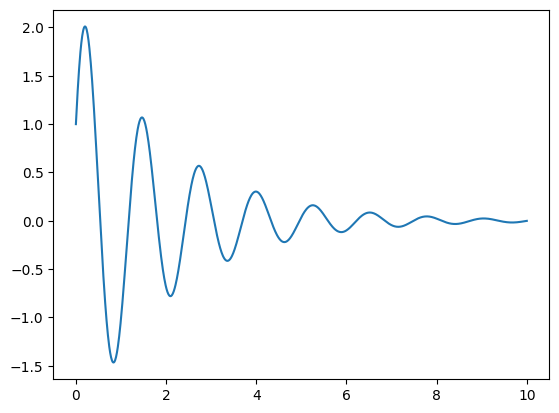

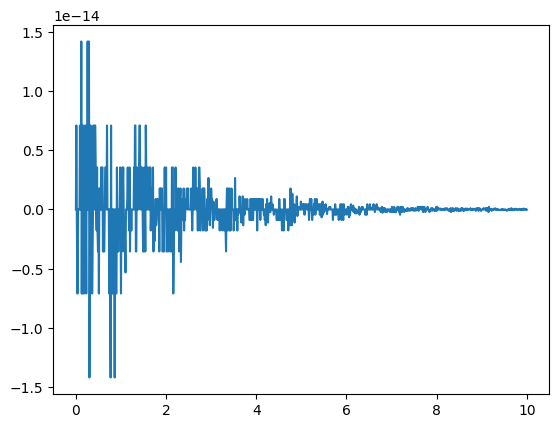

In [1]:
# %load oop/derivative_chain_abc.py
""" [IMPORT] - numpy, plotting, type hinting """
import numpy as np
from matplotlib import pyplot as plt
from typing import Sequence, Tuple, Union, Any, Callable
from abc import ABCMeta, abstractmethod


""" [HELPER] - type aliases """
NumericType = Union[int, float]
FunctionType = Union['DifferentiableFunction', NumericType]


""" [HELPER] - main function for type coercion """
def as_function(func: FunctionType) -> 'DifferentiableFunction':
  """
    func is a DifferentialFunction => return func,
    func is an int or float => return Constant(func),
    func is anything else => this method fails.
  """
  if isinstance(func, DifferentiableFunction):
    return func
  return Constant(func)


""" [NEW] - use the ABCMeta metaclass """
# setting the so-called metaclass to `ABCMeta`
# prevents instantiating classes that do not overwrite
# methods that were tagged as `abstractmethod`.
class DifferentiableFunction(metaclass=ABCMeta):

  def __init__(self, args: Sequence[Any]) -> None:
    self._args = tuple(args)

  """ [NEW] - tag both `__call__` and `_deriv` as abstract methods """
  @abstractmethod
  def __call__(self, x: NumericType):
    pass

  @abstractmethod
  def _deriv(self):
    pass
  """ [/NEW] """

  def derivative(self, n: int = 1) -> 'DifferentiableFunction':
    assert (n := int(n)) >= 0
    if n == 0:
      return self
    return self._deriv().derivative(n=n-1)

  def plot(self, interval: Tuple[int, int] = (0, 1), npoints: int = 1001) -> None:
    """ Plot function over the interval `interval` using `npoints` function evaluations. """
    a, b = interval
    assert b > a
    x = np.linspace(*interval, 1001)
    y = [self(_x) for _x in x]
    plt.plot(x, y)
    plt.show()

  def __add__(self, other: FunctionType) -> 'Add':
    return Add(self, other)

  __radd__ = __add__

  def __mul__(self, other: FunctionType) -> 'Multiply':
    return Multiply(self, other)

  __rmul__ = __mul__

  def __sub__(self, other: FunctionType) -> 'Add':
    return self + (-1) * other

  def __rsub__(self, other: NumericType) -> 'Add':
    return other + (-1) * self


class Constant(DifferentiableFunction):

  def _deriv(self) -> 'Constant':
    return Constant(0)

  def __init__(self, value: NumericType) -> None:
    self.value = float(value)
    super().__init__([self.value])

  def __call__(self, x: NumericType) -> float:
    return self.value


class Argument(DifferentiableFunction):

  def _deriv(self) -> Constant:
    return Constant(1)

  def __init__(self) -> None:
    super().__init__([])

  def __call__(self, x: NumericType) -> float:
    return float(x)


class Add(DifferentiableFunction):

  def _deriv(self) -> 'Add':
    return self.f0.derivative() + self.f1.derivative()

  def __init__(self, f0: FunctionType, f1: FunctionType) -> None:
    self.f0 = as_function(f0)
    self.f1 = as_function(f1)
    super().__init__([self.f0, self.f1])

  def __call__(self, x: NumericType) -> float:
    return self.f0(x) + self.f1(x)


class Multiply(DifferentiableFunction):

  def _deriv(self) -> Add:
    return self.f0.derivative() * self.f1 + self.f0 * self.f1.derivative()

  def __init__(self, f0: FunctionType, f1: FunctionType) -> None:
    self.f0 = as_function(f0)
    self.f1 = as_function(f1)
    super().__init__([self.f0, self.f1])

  def __call__(self, x: NumericType) -> float:
    return self.f0(x) * self.f1(x)


""" [NEW] - instantiating the `ChainRule` class is prevented in the `__init__` """
class ChainRule(DifferentiableFunction):

  evalf: Callable
  df: Callable

  def _deriv(self) -> DifferentiableFunction:
    return self.df(self.argument) * self.argument.derivative()

  """ [NEW] - throw error if the derived class does not implement `evalf` and `df` """
  def __init__(self, argument: FunctionType) -> None:
    assert all(hasattr(self, item) for item in ('evalf', 'df')), 'Each derived class needs to implement `evalf` and `df`.'
    self.argument = as_function(argument)
    super().__init__([self.argument])

  def __call__(self, x: NumericType) -> float:
    return self.evalf(self.argument(x))


class Exp(ChainRule):
  evalf = np.exp
  df = lambda self, argument: self


class Sin(ChainRule):
  evalf = np.sin
  df = lambda self, argument: Cos(argument)


class Cos(ChainRule):
  evalf = np.cos
  df = lambda self, argument: (-1) * Sin(argument)


def test():
  """
    The differential equation:

    y = y(x):

    25 * y + y' + y'' = 0,

    has the general solution:

    y(x) =   c0 * exp(-x/2) * sin(3 * sqrt(11) / 2 * x)
           + c1 * exp(-x/2) * cos(3 * sqrt(11) / 2 * x)
  """

  # Total time interval
  T = 10

  # make an argument f(x) = x
  x = Argument()

  # choose some c0, c1
  c0, c1 = 2, 1

  # make the damping term
  exp = Exp(-.5 * x)

  # define the natural frequency
  w0 = 3 * np.sqrt(11) / 2

  # create y(x) using syntactic sugar
  y = c0 * exp * Sin(w0 * x) + c1 * exp * Cos(w0 * x)

  # set plot interval
  interval = (0, T)

  # plot y:
  y.plot(interval=interval)

  # If we plot the below, what should we get ?
  (25 * y + y.derivative() + y.derivative(2)).plot(interval=interval)


if __name__ == '__main__':
  test()


In [2]:
""" [SETUP] - create nonsense arguments """
some_random_arguments = [5, 6.0, 'Connie']

### 

In [6]:
""" [FOCUS] - try to instantiate the `DifferentiableFunction` base class """

try:
  print("Attempting to instantiate the `DifferentialFunction` base class.\n")
  broken_function = DifferentiableFunction(some_random_arguments)
except Exception as ex:
  print("Failed with exception `{}`.\n".format(ex))

Attempting to instantiate the `DifferentialFunction` base class.

Failed with exception `Can't instantiate abstract class DifferentiableFunction without an implementation for abstract methods '__call__', '_deriv'`.



### 

In [7]:
""" [FOCUS] - try to instantiate the `ChainRule` derived base class """

try:
  print("Attempting to instantiate the `ChainRule` base class.\n")
  broken_function = ChainRule(some_random_arguments)
except Exception as ex:
  print("Failed with exception `{}`.\n".format(ex))

Attempting to instantiate the `ChainRule` base class.

Failed with exception `Each derived class needs to implement `evalf` and `df`.`.



### 
<hr style="border:1px solid blue">

### 

### 
### What we have learned:
### 1. Inheritance is a convenient way to implement shared behaviour between derived classes.
### 2. We can prevent instantiation of the base class using `abc` or by raising an error in `__init__`.
### 3. A proper inherited class always calls `super().__init__` in its own `__init__`.
### 
<hr style="border:1px solid blue">

### 


# <u>(Short) Lesson 4</u>:
## Multiple inheritance

### 

### A `Bird` is an animal that can fly.
### As such, it's tempting to have `:class: Bird` inherit from two base classes:
### `:class: Animal` and `:class: FlyingObject`.
### 
### Is that a good idea ?
### 
### <u>Short answer</u>:
### No.
### 
### <u>Long answer</u>:
### *''If you think you need multiple inheritance, you're almost always wrong.*
### *If you know you need it, you're almost always right.''*
### 
### Multiple inheritance is considered **bad practice**.
### It is confusing, unintuitive and often has unintended side effects.
### It is so confusing that some languages (Java, ...) prohibit it.
### 
### There are a handful of admissible use cases of multiple inheritance,
### chief among them: `Mixins`.
### 
### A `Mixin` is a `class`, often without an `__init__` itself, that adds one or
### a number of functions to an existing class.
### 
### <u>Example</u>:

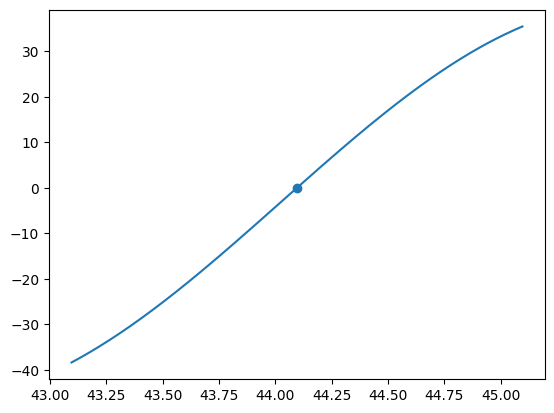

In [10]:
# %load oop/derivative_chain_mixin.py
""" [IMPORT] - numpy, plotting, type hinting """
import numpy as np
from matplotlib import pyplot as plt
from typing import Sequence, Tuple, Union, Any, Callable


""" [HELPER] - type aliases, function coercion """
NumericType = Union[int, float]
FunctionType = Union['DifferentiableFunction', NumericType]


def as_function(func: FunctionType) -> 'DifferentiableFunction':
  if isinstance(func, DifferentiableFunction):
    return func
  return Constant(func)


""" [NEW] - Mixin for finding roots """
# It is best practice to end the class name on `Mixin`
class FindRootMixin:
  """ Class that contains one function to find a root. """

  def __init__(self, *args, **kwargs):
    """ Whatever arguments, forward them to the next base class in line. """
    super().__init__(*args, **kwargs)

  def find_root(self, x0=0, **scipykwargs):
    from scipy.optimize import root_scalar
    root, = root_scalar(lambda x: self(x[0]), x0=[x0], **scipykwargs).root
    x = np.linspace(root - 1, root + 1, 1001)
    y = [self(_x) for _x in x]
    plt.plot(x, y)
    plt.scatter([root], [self(root)])
    plt.show()


""" [FOCUS] - By default:
    1) we assume that the function can't have roots.
    2) If it can have roots, we overwrite `find_root` using the Mixin from above. """
class DifferentiableFunction:

  def __init__(self, args: Sequence[Any]) -> None:
    self._args = tuple(args)

  def __call__(self, x: NumericType):
    raise NotImplementedError("Each derived class needs to implement its call behaviour.")

  def _deriv(self):
    raise NotImplementedError("Each derived class needs to implement its derivative.")

  """ [NEW] - overwrite this method in case the function can have roots """
  def find_root(self, *args, **kwargs):
    raise TypeError("Functions of class {} have no roots.".format(self.__class__.__name__))

  def derivative(self, n: int = 1) -> 'DifferentiableFunction':
    assert (n := int(n)) >= 0
    if n == 0:
      return self
    return self._deriv().derivative(n=n-1)

  def plot(self, interval: Tuple[int, int] = (0, 1), npoints: int = 1001) -> None:
    """ Plot function over the interval `interval` using `npoints` function evaluations. """
    a, b = interval
    assert b > a
    x = np.linspace(*interval, 1001)
    y = [self(_x) for _x in x]
    plt.plot(x, y)
    plt.show()

  def __add__(self, other: FunctionType) -> 'Add':
    return Add(self, other)

  __radd__ = __add__

  def __mul__(self, other: FunctionType) -> 'Multiply':
    return Multiply(self, other)

  __rmul__ = __mul__

  def __sub__(self, other: FunctionType) -> 'Add':
    return self + (-1) * other

  def __rsub__(self, other: NumericType) -> 'Add':
    return other + (-1) * self


# Constant ain't got no root (FIXME: unless the value is 0...)
class Constant(DifferentiableFunction):

  def _deriv(self) -> 'Constant':
    return Constant(0)

  def __init__(self, value: NumericType) -> None:
    self.value = float(value)
    super().__init__([self.value])

  def __call__(self, x: NumericType) -> float:
    return self.value


""" [NEW] - f(x) = x has a root. To overwrite, the Mixin must be inherited from first. """
# f(x) = x has a root. To overwrite, the Mixin must be inherited from first.
class Argument(FindRootMixin, DifferentiableFunction):

  def _deriv(self) -> Constant:
    return Constant(1)

  def __init__(self) -> None:
    super().__init__([])

  def __call__(self, x: NumericType) -> float:
    return float(x)


""" [NEW] - the sum of two functions can have roots """
# Can have roots.
class Add(FindRootMixin, DifferentiableFunction):

  def _deriv(self) -> 'Add':
    return self.f0.derivative() + self.f1.derivative()

  def __init__(self, f0: FunctionType, f1: FunctionType) -> None:
    self.f0 = as_function(f0)
    self.f1 = as_function(f1)
    super().__init__([self.f0, self.f1])

  def __call__(self, x: NumericType) -> float:
    return self.f0(x) + self.f1(x)


""" [NEW] - the product of two functions can have roots """
# Can have roots.
class Multiply(FindRootMixin, DifferentiableFunction):

  def _deriv(self) -> Add:
    return self.f0.derivative() * self.f1 + self.f0 * self.f1.derivative()

  def __init__(self, f0: FunctionType, f1: FunctionType) -> None:
    self.f0 = as_function(f0)
    self.f1 = as_function(f1)
    super().__init__([self.f0, self.f1])

  def __call__(self, x: NumericType) -> float:
    return self.f0(x) * self.f1(x)


class ChainRule(DifferentiableFunction):
  # All functions that are subject to the chain rule: d(f(g)) = df(g) * dg

  evalf: Callable
  df: Callable

  def _deriv(self) -> DifferentiableFunction:
    return self.df(self.argument) * self.argument.derivative()

  def __init__(self, argument: FunctionType) -> None:
    self.argument = as_function(argument)
    super().__init__([self.argument])

  def __call__(self, x: NumericType) -> float:
    return self.evalf(self.argument(x))


# Exp ain't got no roots
class Exp(ChainRule):
  evalf = np.exp
  df = lambda self, argument: self


""" [NEW] - sin(f(x)) may have roots """
# has roots
class Sin(FindRootMixin, ChainRule):
  evalf = np.sin
  df = lambda self, argument: Cos(argument)


""" [NEW] - cos(f(x)) may have roots """
# has roots
class Cos(FindRootMixin, ChainRule):
  evalf = np.cos
  df = lambda self, argument: (-1) * Sin(argument)


""" [HELPER] - find the root of y(x) = x * sin(x) - 5 """
def test():
  """
    Find the root of y(x) = x * sin(x) - 5.
  """

  x = Argument()
  y = x * Sin(x) - 5

  y.find_root(x0=2)


if __name__ == '__main__':
  test()


### Note that this is less confusing because we just use the `Mixin` to
### add / overwrite a function. 
### The method hierarchy is therefore still flat and easy to follow.
### 
<hr style="border:1px solid blue">

### 
### What we have learned:
### 1. Multiple inheritance is not prohibited but discouraged.
### 2. Mixins are a sometimes useful exception to the rule.
### 3. The point of OOP is not to write overengineered multiple inheritance classes
### $\quad$ but to **KEEP IT SIMPLE** (your coworkers need to understand it too).
### 
<hr style="border:1px solid blue">

### 


# <u>Lesson 5</u>:
## Writing Hashable classes and the use of `collections.abc`
### 
### We have seen in our previous implementation of `DifferentiableFunction`
### that we were always passing references to all attributes, that are
### characteristic for the class, to the `super().__init__` function:
### 

```python
# minimal example
class DifferentiableFunction:

  def __init__(self, args: Sequence[Any]) -> None:
    self._args = tuple(args)

  def __call__(self, x: NumericType):
    raise NotImplementedError("Each derived class needs to implement its call behaviour.")

  def _deriv(self):
    raise NotImplementedError("Each derived class needs to implement its derivative.")

    
class Constant(DifferentiableFunction):

  def _deriv(self) -> 'Constant':
    return Constant(0)

  """ [FOCUS] - why pass `self.value` to `super().__init__`, i.e., `DifferentiableFunction.__init__` ? """
  def __init__(self, value: NumericType) -> None:
    self.value = float(value)
    # WHY PASS self.value AGAIN ?
    super().__init__([self.value])

  def __call__(self, x: NumericType) -> float:
    return self.value
```

### 
### In the previous lecture we have learned that some Python built-in types are `hashable` and others are not.
### 
### Hashable are the ones that are `immutable`, i.e., once instantiated, cannot be changed.
### <u>Hashable</u>: `str`, `tuple` (as long as each element is hashable), `float`, `int`, ...
### <u>Not hashable</u>: `list`, `set`, `dict`, ...

### 
### $\implies$  by passing all characteristic attributes to the `super().__init__` function 
### which stores them as a tuple, we can assign our own hash value to each class instantiation
### as long as each attribute is itself hashable. 
### That's why we store sequence attributes as `tuple`, not as `list`.
### 
### A reasonable way to assign a `hash` value to our self-written class `DifferentiableFunction` is `hash(self._args)`.
### We can implement what is returned when acting with `hash()` on a class by implementing `__hash__`.
### 
### A proper implementation of a `hashable` class also always implements `__eq__(self, other) -> bool`
### to check whether `self: DifferentiableFunction == other: Any` is `True` or `False`. 
### This is necessary to avoid **hash collisions**.
### 
### Find a minimal implementation below

In [14]:
# %load oop/derivative_chain_hashable_base.py
""" [IMPORT] """
import numpy as np
from typing import Sequence, Union, Any, Callable


""" [HELPER] """
NumericType = Union[int, float]
FunctionType = Union['DifferentiableFunction', NumericType]


def as_function(func: FunctionType) -> 'DifferentiableFunction':
  """
    func is a DifferentialFunction => return func,
    func is an int or float => return Constant(func),
    func is anything else => this method fails.
  """
  if isinstance(func, DifferentiableFunction):
    return func
  return Constant(func)
""" [/HELPER] """


class DifferentiableFunction:

  def __init__(self, args: Sequence[Any]) -> None:
    self._args = tuple(args)

    """ [NEW] - compute the hash value of the instance and store it """
    self._hash = hash(self._args)  # will fail if an element of `args` is not hashable

  """ [NEW] - make the instance hashable """
  def __hash__(self) -> int:
    return self._hash

  """ [NEW] - make the instance comparable self == other ? """
  def __eq__(self, other: Any) -> bool:
    # class not the same => False, hash not the same => instance._args not the same => False
    # If other doesn't have a hash, there's no problem because the first check will fail.
    return self.__class__ is other.__class__ and hash(self) == hash(other) and self._args == other._args

  def __add__(self, other: FunctionType) -> 'Add':
    return Add(self, other)

  def __mul__(self, other: FunctionType) -> 'Multiply':
    return Multiply(self, other)


class Constant(DifferentiableFunction):

  def __init__(self, value: NumericType) -> None:
    self.value = float(value)
    super().__init__([self.value])


class Argument(DifferentiableFunction):

  def __init__(self) -> None:
    super().__init__([])


class Add(DifferentiableFunction):

  def __init__(self, f0: FunctionType, f1: FunctionType) -> None:
    self.f0 = as_function(f0)
    self.f1 = as_function(f1)
    super().__init__([self.f0, self.f1])


class Multiply(DifferentiableFunction):

  def __init__(self, f0: FunctionType, f1: FunctionType) -> None:
    self.f0 = as_function(f0)
    self.f1 = as_function(f1)
    super().__init__([self.f0, self.f1])


class ChainRule(DifferentiableFunction):

  evalf: Callable
  df: Callable

  def __init__(self, argument: FunctionType) -> None:
    self.argument = as_function(argument)
    super().__init__([self.argument])


class Exp(ChainRule):
  evalf = np.exp
  df = lambda self, argument: self


class Sin(ChainRule):
  evalf = np.sin
  df = lambda self, argument: Cos(argument)


class Cos(ChainRule):
  evalf = np.cos
  df = lambda self, argument: (-1) * Sin(argument)


""" [HELPER] - validate """
def test():
  """
    Test the whether the class instantiations are
    hashable and whether `a == b` acts as expected.
  """

  x = Argument()

  print(f"The hash value of x is {hash(x)}. \n")

  sinx = Sin(x)

  print(f"The hash value of sin(x) is {hash(sinx)}. \n")

  print(f"x == sin(x) is {x == sinx}. \n")
  print(f"sin(x) == sin(x) is {sinx == sinx}. \n")

  try:
    print('Trying to use sin(x) as a key in a dictionary.')
    test = {}
    test[sinx] = 5
    print('Works ! \n')
  except Exception as ex:
    print("Failed with error '{}'.".format(ex))

  apb = x + sinx
  bpa = sinx + x

  print(f"x + sin(x) == sin(x) + x is {apb == bpa} >.<")


if __name__ == '__main__':
  test()


The hash value of x is 5740354900026072187. 

The hash value of sin(x) is -5486347211504344842. 

x == sin(x) is False. 

sin(x) == sin(x) is True. 

Trying to use sin(x) as a key in a dictionary.
Works ! 

x + sin(x) == sin(x) + x is False >.<


### 
### 
### Little hair in the soup:
### The implementation doesn't respect the commutability of addition and multiplication.
### 
### A reasonable solution sorts the input functions `f0` and `f1` first by their class (Argument, Constant, Cos, ...)
### then by their hash value: 
### `f0, f1 = sorted([f0, f1], key=lambda x: (x.__class__.__name__, hash(x))`.

In [12]:
class Add(DifferentiableFunction):

  """ [NEW] - store sorted attributes """
  def __init__(self, f0: FunctionType, f1: FunctionType) -> None:
    self.f0, self.f1 = sorted(map(as_function, (f0, f1)), key=lambda x: (x.__class__.__name__, hash(x)))
    super().__init__([self.f0, self.f1])


class Multiply(DifferentiableFunction):

  """ [NEW] - store sorted attributes """
  def __init__(self, f0: FunctionType, f1: FunctionType) -> None:
    self.f0, self.f1 = sorted(map(as_function, (f0, f1)), key=lambda x: (x.__class__.__name__, hash(x)))
    super().__init__([self.f0, self.f1])


""" [HELPER] - validate """
def test():
  """
    Test the whether the class instantiations are
    hashable and whether `a == b` acts as expected.
  """

  x = Argument()

  print(f"The hash value of x is {hash(x)}. \n")

  sinx = Sin(x)

  print(f"The hash value of sin(x) is {hash(sinx)}. \n")

  print(f"x == sin(x) is {x == sinx}. \n")
  print(f"sin(x) == sin(x) is {sinx == sinx}. \n")

  try:
    print('Trying to use sin(x) as a key in a dictionary.')
    test = {}
    test[sinx] = 5
    print('Works ! \n')
  except Exception as ex:
    print("Failed with error '{}'.".format(ex))

  apb = x + sinx
  bpa = sinx + x

  print(f"x + sin(x) == sin(x) + x is {apb == bpa} =)")


if __name__ == '__main__':
  test()

The hash value of x is 5740354900026072187. 

The hash value of sin(x) is -5486347211504344842. 

x == sin(x) is False. 

sin(x) == sin(x) is True. 

Trying to use sin(x) as a key in a dictionary.
Works ! 

x + sin(x) == sin(x) + x is True =)


### 
<hr style="border:1px solid blue">

### 
### A way to enforce that your class implement the `__hash__(self)` magic function
### is to have it inherit from `collections.abc.Hashable`.
### 
### This has several advantages: 
### 1. You can't accidentally instantiate a derived class that doesn't implement `__hash__`.
### 2. You clearly communicate to yourself and others that your class intends to be hashable and immutable.
### 3. `Hashable` can be used in static type checking because every class `A` that implements `__hash__`
### satisfies `issubclass(A, Hashable) is True`.
### 
### Note furthermore that inheriting from `Hashable` prevents instantiating classes that do not implement
### other functions that were tagged as `abstractmethod`. 
### This is because `Hashable` uses the `ABCMeta` `metaclass` as in the example from Lesson 3.

### 
### Something like this:
```python
class Hashable(metaclass=ABCMeta):
  ...
```
### 

In [13]:
""" [IMPORT] - Hashable, abstractmethod """
from collections.abc import Hashable
from abc import abstractmethod


""" [FOCUS] - Class that implements `__hash__` """
class MyHashableClass:
  def __hash__(self):
    return 5


""" [HELPER] - is an instance of `MyHashableClass` an instance of `Hashable` ? """
a = MyHashableClass()

print(f'a of type {type(a)} is an instantiation of Hashable: {isinstance(a, Hashable)}.\n')

a of type <class '__main__.MyHashableClass'> is an instantiation of Hashable: True.

Trying to instantiate the `NotHashable` class.
Failed with exception 'Can't instantiate abstract class NotHashable without an implementation for abstract method '__hash__''.

Trying to instantiate the `HashableButSomethingElseIsMissing` class.
Failed with exception 'Can't instantiate abstract class HashableButSomethingElseIsMissing without an implementation for abstract method 'something_else''.



### 

In [ ]:
""" [FOCUS] - Class that inherits from `Hashable` but doesn't implement `__hash__` """
class NotHashable(Hashable):
  pass


""" [HELPER] - can it be instantiated ? """
try:
  print('Trying to instantiate the `NotHashable` class.')
  a = NotHashable()
except Exception as ex:
  print("Failed with exception '{}'.\n".format(ex))

### 

In [ ]:
""" [FOCUS] - Class that implements `__hash__` but something else is missing """
class HashableButSomethingElseIsMissing(Hashable):
  def __hash__(self):
    return 5

  @abstractmethod
  def something_else(self):
    pass


""" [HELPER] - can it be instantiated ? """
try:
  print('Trying to instantiate the `HashableButSomethingElseIsMissing` class.')
  a = HashableButSomethingElseIsMissing()
except Exception as ex:
  print("Failed with exception '{}'.\n".format(ex))

### 
### Find an implementation using `Hashable` below.
### Note that we are caching in `.derivative()` by using the `cached` `_derivative` function
### which is possible because each derived class is `hashable`.
### 
### We also add a class `BrokenClass` that passes a mutable value to the `DifferentiableFunction.__init__`.
### We can run static typechecking on this example and `mypy` will warn us of this flaw in our code.
### 

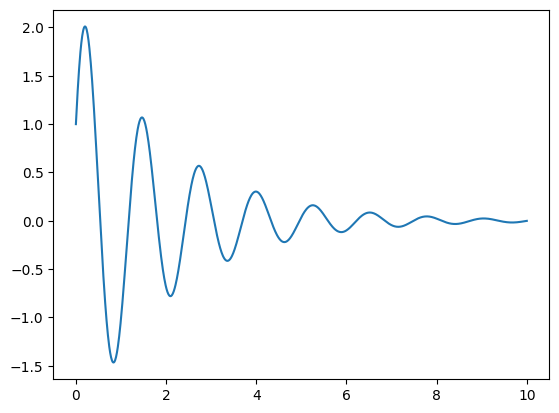

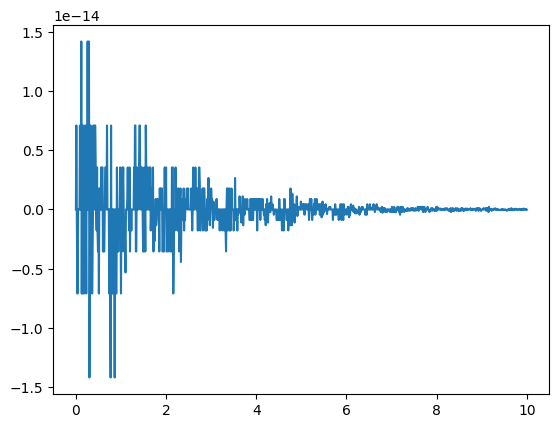

In [15]:
# %load oop/derivative_chain_Hashable.py
""" [IMPORT] """
import numpy as np
from matplotlib import pyplot as plt
from typing import Sequence, Tuple, Union, Any, Callable
from abc import abstractmethod
from collections.abc import Hashable

from functools import lru_cache


""" [HELPER] """
NumericType = Union[int, float]
FunctionType = Union['DifferentiableFunction', NumericType]


# main function for type coercion
def as_function(func: FunctionType) -> 'DifferentiableFunction':
  """
    func is a DifferentialFunction => return func,
    func is an int or float => return Constant(func),
    func is anything else => this method fails.
  """
  if isinstance(func, DifferentiableFunction):
    return func
  return Constant(func)
""" [/HELPER] """


""" [NEW] - main scope cached first order derivative
           function called in `DifferentiableFunction.derivative()` """
@lru_cache
def _derivative(self: 'DifferentiableFunction') -> 'DifferentiableFunction':
  """
  All our classes are hashable. They can be used in combination with lru_cache.
  We call this function in DifferentiableFunction.derivative().
  We will never again compute a derivative twice ;-)
  """
  return self._deriv()


# inheriting from `Hashable` automatically inherits that
# metaclass=ABCMeta
class DifferentiableFunction(Hashable):

  def __init__(self, args: Sequence[Hashable]) -> None:
    self._args = tuple(args)
    self._hash = hash(self._args)

  def __hash__(self) -> int:
    return self._hash

  def __eq__(self, other: Any) -> bool:
    return self.__class__ == other.__class__ and hash(self) == hash(other) and self._args == other._args

  @abstractmethod
  def __call__(self, x: NumericType):
    pass

  @abstractmethod
  def _deriv(self):
    pass

  """ [NEW] - called `cached` first order derivative repeatedly """
  def derivative(self, n: int = 1) -> 'DifferentiableFunction':
    assert (n := int(n)) >= 0
    if n == 0:
      return self
    # use the cached version.
    return _derivative(self).derivative(n=n-1)

  def plot(self, interval: Tuple[int, int] = (0, 1), npoints: int = 1001) -> None:
    """ Plot function over the interval `interval` using `npoints` function evaluations. """
    a, b = interval
    assert b > a
    x = np.linspace(*interval, 1001)
    y = [self(_x) for _x in x]
    plt.plot(x, y)
    plt.show()

  def __add__(self, other: FunctionType) -> 'Add':
    "self: DifferentialFunction + other: FunctionType"
    return Add(self, other)

  __radd__ = __add__

  def __mul__(self, other: FunctionType) -> 'Multiply':
    "self: DifferentialFunction * other: FunctionType"
    return Multiply(self, other)

  __rmul__ = __mul__

  def __sub__(self, other: FunctionType) -> 'Add':
    "self: DifferentialFunction - other: FunctionType"
    return self + (-1) * other

  def __rsub__(self, other: NumericType) -> 'Add':
    """
      other: NumericType - self: DifferentialFunction.
      Here, the -1 has to go in front of self.
      other - self => self.__rsub__(other).
    """
    return other + (-1) * self


class Constant(DifferentiableFunction):

  def _deriv(self) -> 'Constant':
    return Constant(0)

  def __init__(self, value: NumericType) -> None:
    self.value = float(value)
    super().__init__([self.value])

  def __call__(self, x: NumericType) -> float:
    return self.value


class Argument(DifferentiableFunction):

  def _deriv(self) -> Constant:
    return Constant(1)

  def __init__(self) -> None:
    super().__init__([])

  def __call__(self, x: NumericType) -> float:
    return float(x)


class Add(DifferentiableFunction):

  def _deriv(self) -> 'Add':
    return self.f0.derivative() + self.f1.derivative()

  def __init__(self, f0: FunctionType, f1: FunctionType) -> None:
    self.f0, self.f1 = sorted(map(as_function, (f0, f1)), key=lambda x: (x.__class__.__name__, hash(x)))
    super().__init__([self.f0, self.f1])

  def __call__(self, x: NumericType) -> float:
    return self.f0(x) + self.f1(x)


class Multiply(DifferentiableFunction):

  def _deriv(self) -> Add:
    return self.f0.derivative() * self.f1 + self.f0 * self.f1.derivative()

  def __init__(self, f0: FunctionType, f1: FunctionType) -> None:
    self.f0, self.f1 = sorted(map(as_function, (f0, f1)), key=lambda x: (x.__class__.__name__, hash(x)))
    super().__init__([self.f0, self.f1])

  def __call__(self, x: NumericType) -> float:
    return self.f0(x) * self.f1(x)


class ChainRule(DifferentiableFunction):

  evalf: Callable
  df: Callable

  def _deriv(self) -> DifferentiableFunction:
    return self.df(self.argument) * self.argument.derivative()

  def __init__(self, argument: FunctionType) -> None:
    assert all(hasattr(self, item) for item in ('evalf', 'df')), 'Each derived class needs to implement `evalf` and `df`.'
    self.argument = as_function(argument)
    super().__init__([self.argument])

  def __call__(self, x: NumericType) -> float:
    return self.evalf(self.argument(x))


class Exp(ChainRule):
  evalf = np.exp
  df = lambda self, argument: self


class Sin(ChainRule):
  evalf = np.sin
  df = lambda self, argument: Cos(argument)


class Cos(ChainRule):
  evalf = np.cos
  df = lambda self, argument: (-1) * Sin(argument)


""" [NEW] - We define a class that passes a Sequence of non-hashable types as `args`
            to `super().__init__(self, args)`.
            Since we annotated `args` as a `Sequence[Hashable]`, static type
            checking will complain. """
class BrokenClass(DifferentiableFunction):

  """ [FOCUS] - pass a non-hashable list [1, 2, 3] as sole argument to super().__init__ """
  def __init__(self) -> None:
    super().__init__([[1, 2, 3]])

  def _deriv(self) -> DifferentiableFunction:
    return Constant(0)

  def __call__(self, x: float) -> float:
    return 0.0


""" [HELPER] - solve PDE as before """
def test():
  """
    The differential equation:

    y = y(x):

    25 * y + y' + y'' = 0,

    has the general solution:

    y(x) =   c0 * exp(-x/2) * sin(3 * sqrt(11) / 2 * x)
           + c1 * exp(-x/2) * cos(3 * sqrt(11) / 2 * x)
  """

  # Total time interval
  T = 10

  # make an argument f(x) = x
  x = Argument()

  # choose some c0, c1
  c0, c1 = 2, 1

  # make the damping term
  exp = Exp(-.5 * x)

  # define the natural frequency
  w0 = 3 * np.sqrt(11) / 2

  # create y(x) using syntactic sugar
  y = c0 * exp * Sin(w0 * x) + c1 * exp * Cos(w0 * x)

  # set plot interval
  interval = (0, T)

  # plot y:
  y.plot(interval=interval)

  # If we plot the below, what should we get ?
  (25 * y + y.derivative() + y.derivative(2)).plot(interval=interval)


if __name__ == '__main__':
  test()


### The implementation annotates `DifferentiableFunction.__init__(self, args: Sequence[Hashable])`
### to declare `args` as a sequence of `Hashable`s.
### Run `mypy oop/derivative_chain_hashable.py` to see how mypy catches passing the
### non-hashable `args` to `DifferentiableFunction.__init__(self, args)` in `BrokenClass`

### 
<hr style="border:1px solid blue">

### 
### The `collections.abc` module provides further base classes to inherit from.
### Here are a few useful ones (examples below):
### 1. `collections.abc.Iterable`, abstract: `__iter__`
### 2. `collections.abc.Mapping`, abstract: `__getitem__, __iter__, __len__`
### 
### 1. Customises the behaviour when iterating over your class: `for item in instantiation`: ...
### 2. allows you to implement `dict`-like classes. Always inherit from `Mapping`, never from `dict` directly.
### 
### <u> Example for `Iterable` </u>:

In [17]:
""" [IMPORT] - Iterable, Mapping base class """
from collections.abc import Iterable, Mapping
from typing import Sequence, Tuple
import numpy as np


""" [FOCUS] - Class representing a quadrature rule """
class QuadratureFormula(Iterable):

  """ [FOCUS] - take weights and points of the quadrule """
  def __init__(self, points: np.ndarray|Sequence, weights: np.ndarray|Sequence) -> None:
    self.points = np.asarray(points, dtype=float)
    self.weights = np.asarray(weights, dtype=float)

  """ [FOCUS] - when iterating over instantiation
      >>> for item in quadrule:
      >>>   ...
      we get, in turn, quadrule.points and then quadrule.weights """
  def __iter__(self):
    yield from (self.points, self.weights)
      

""" [HELPER] - instantiate `QuadratureFormula` using Gauss points and weights over [-1, 1] """
def gauss(n: int) -> QuadratureFormula:
  points, weights = np.polynomial.legendre.leggauss(n)
  return QuadratureFormula(points, weights)


""" [SETUP] - make Gauss scheme of order 3 """
gauss3 = gauss(3)


""" [FOCUS] - since __iter__ produces gauss3.points and then gauss3.weights,
              out custom class will unpack like so: """
# variable unpacking invokes __iter__
points, weights = gauss3


""" [FOCUS] - you can also iterate into a tuple, list, ... """
print(f"Converting `gauss3` to tuple: {tuple(gauss3)}.\n")

Converting `gauss3` to tuple: (array([-0.77459667,  0.        ,  0.77459667]), array([0.55555556, 0.88888889, 0.55555556])).



### 
### <u> Example for `Mapping`</u>:

In [27]:
""" [FOCUS] - sparse COO matrix, (i, j) -> value.
    We represent it as a mapping:
    {'coordinates': intarray, 'values': floatarray, 'shape': Tuple[int, int] } """
class COOMatrix(Mapping):

  def __init__(self, coordinates: np.ndarray|Sequence,
                     values:      np.ndarray|Sequence,
                     shape:       Tuple[int, int]       ):
    
    self.coordinates = np.asarray(coordinates, dtype=int).reshape(-1, 2)
    self.values = np.asarray(values, dtype=float)
    assert self.values.shape == self.coordinates.shape[:1]
    
    self.shape = tuple(shape)
    assert len(self.shape) == 2

  """ [FOCUS] - `dict` representation has three entries """
  def __len__(self):
    return 3

  """ [FOCUS] - the attribute names are, in order, 'coordinates', 'values', 'shape'.
                They become the dictionary's keys. """
  def __iter__(self):
    for item in ('coordinates', 'values', 'shape'):
      yield item

  """ [FOCUS] - given attribute name, return corresponding attribute """
  def __getitem__(self, attr_name):
    "string == 'coordinates' => return self.coordinates"
    return getattr(self, attr_name)


""" [HELPER] - function to print COO matrix attributes """
def print_COO(coordinates=None, values=None, shape=None):
  print(f"coordinates:\n {coordinates},\n \n values: \n {values}, shape: {shape}. \n")
  

""" [SETUP] - create a diagonal matrix in COO format """
diag_matrix = COOMatrix(
                        np.stack([np.arange(10), np.arange(10)], axis=1),
                        np.random.randn(10),
                        (10, 10)
                       )

""" [FOCUS] - we can unpack directly, like a dictionary """
# instead of this
print_COO(coordinates=diag_matrix.coordinates, values=diag_matrix.values, shape=diag_matrix.shape)

# we can simply do this (much less boilerplate !).
print_COO(**diag_matrix)


""" [FOCUS] - we can also convert to `dict` """
print(f"`diag_matrix` converted to `dict` gives:\n {dict(diag_matrix)}.")

coordinates:
 [[0 0]
 [1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]
 [6 6]
 [7 7]
 [8 8]
 [9 9]],
 
 values: 
 [-0.37360548  0.74759519 -0.3099264   0.53720041  1.53895566  0.05392827
 -1.21448304  0.44838011 -1.15349874  1.0469013 ], shape: (10, 10). 

coordinates:
 [[0 0]
 [1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]
 [6 6]
 [7 7]
 [8 8]
 [9 9]],
 
 values: 
 [-0.37360548  0.74759519 -0.3099264   0.53720041  1.53895566  0.05392827
 -1.21448304  0.44838011 -1.15349874  1.0469013 ], shape: (10, 10). 

`diag_matrix` converted to `dict` gives:
 {'coordinates': array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5],
       [6, 6],
       [7, 7],
       [8, 8],
       [9, 9]]), 'values': array([-0.37360548,  0.74759519, -0.3099264 ,  0.53720041,  1.53895566,
        0.05392827, -1.21448304,  0.44838011, -1.15349874,  1.0469013 ]), 'shape': (10, 10)}.


### 
<hr style="border:1px solid blue">

### 

### 
### What we have learned:
### 1. We can write our own `hashable` classes for use in combination with `functools.lru_cache`.
### 2. It is considered good practice to inherit from `collections.abc.Hashable`.
### 3. The `collections.abc` module provides further protocols like `Iterable` and `Mapping`.
### 

### 
<hr style="border:1px solid blue">

### 
# <u>Lesson 6</u>:
## `classmethod`, `cached_property` and the use of `self.__class__`
### 
### In our implementation of the `DifferentiableFunction` class, we immediatedly set
### the `class`'s `hash` value `self._hash = hash(self._args)` upon setting `self._args = tuple(args)`:
### 
```python
class DifferentiableFunction(Hashable):

  def __init__(self, args: Sequence[Hashable]) -> None:
    self._args = tuple(args)

    """ [FOCUS] """
    self._hash = hash(self._args)

  def __hash__(self) -> int:
    return self._hash
```

### 
### Computing the `hash` for a `class` instantiation is not very expensive.
### 
### However, if our function is complex and requires many instantiations of
### `Add`, `Multiply`, `Cos`, ..., computing the `hash` each time we run `__init__`
### can become non-negligible. This is especially true if the likelyhood of us needing
### each instantiation's `hash` is low.
### 
### One way to avoid the computation of `self._hash` each time we run `__init__` is
### making `self._hash` a `cached_property`. 
### 
### A `cached_property` is computed as soon as it is called for the first time.
### After that it is remembered through caching:

In [29]:
""" [IMPORT] - Hashable, cached_property """
from collections.abc import Hashable
from typing import Sequence
from time import sleep
from functools import cached_property


class DifferentiableFunction(Hashable):

  """ [NEW] - we remove the immediate computation of `self._hash = hash(self._args)` """
  def __init__(self, args: Sequence[Hashable]) -> None:
    self._args = tuple(args)

  """ [NEW] - instead, we compute it when called and remember the output """
  @cached_property
  def _hash(self) -> int:
    print('Computing the hash value, this may take a while...')
    sleep(2)
    return hash(self._args)

  """ [FOCUS] -  Invoking `hash(instance)` calls `instance._hash` (no parenthesis) """
  def __hash__(self) -> int:
    return self._hash  # like a property, a cached_property is called without ()
  

""" [SETUP] - pass some fake hashable arguments """
fake_function = DifferentiableFunction([5, 2, 3, 'Connie'])


""" [HELPER] - compute `hash` twice. Second time should be instantaneous """
print("fake_function's hash is: ", hash(fake_function))
print("fake_function's hash is: ", hash(fake_function))

Computing the hash value, this may take a while...
fake_function's hash is:  2907569133589745117
fake_function's hash is:  2907569133589745117


### 
### Postponing the evaluation of something until it is needed using,
### for instance, `cached_property` is referred to as `lazy evaluation`.
### Our implementation that computes the `self._hash` in `__init__` , instead,
### does `eager evaluation`.
### 
<hr style="border:1px solid blue">

### 
### For discussing `classmethod`, we come back to our previous implementation of `Polynomial`.
### We add a derived class called `MonicPolynomial`, which satisfies `weights[-1] == 1.0`.
### 

In [ ]:
""" [IMPORT] """
from typing import Sequence, Self, Tuple
from itertools import zip_longest, dropwhile
from functools import cached_property
from more_itertools import convolve



""" [HELPER] - simplified version of the `Polynomial` class, as before """
def truncate_trailing_zeros(tpl: Sequence[int|float]) -> Tuple[float, ...]:
  """
      [] => (0.0,)
      [1, 0, 0] => (1.0,)
      (0, 1, 0) => (0.0, 1.0)
  """
  return tuple(dropwhile(lambda x: x==0, map(float, reversed(tpl))))[::-1] or (0.0,)



class Polynomial:

  def __init__(self, weights: Sequence[float | int]) -> None:
    self.weights = truncate_trailing_zeros(weights)

  """ [NEW] - instead of `property`, use `cached_property` """
  @cached_property
  def order(self) -> int:
    return len(self.weights) - 1
  
  def __call__(self, x: int | float) -> float:
    return sum(a * x**i for i, a in enumerate(self.weights))

  def __repr__(self) -> str:
    ret = '{}({})'.format(
                self.__class__.__name__,
                ' + '.join(reversed([f'{a}x^{i}' for i, a in enumerate(self.weights) if a]))\
               .replace('x^0', '') \
               .replace(' 1x', ' x')\
               .replace('+ -', '- '))
    if not ret: return '0'
    return ret
""" [/HELPER] """
  


""" [FOCUS] - Polynomial with highest-order prefactor == 1 """
class MonicPolynomial(Polynomial):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)
    assert self.weights[-1] == 1.0

### 
### Suppose you want to write a function that creates a polynomial $p$ from its roots $a_0, a_1, \ldots, a_N$:
### $p(x) = (x - a_0) (x - a_1) \ldots (x - a_N)$. The polynomial $p$ is simultaneously a `Polynomial` and 
### a `MonicPolynomial`. Suppose you want to have the choice how to instantiate $p(x)$. Maybe like this ?
### 

In [ ]:
from functools import reduce


def pol_from_roots(list_of_roots, output_type=Polynomial):
  """
    Return a subclass of Polynonial from the polynomial roots
    
    Parameters
    ----------
    list_of_roots : list containing the root values
    output_type : subclass of `Polynomial` type to instantiate
  """
  assert issubclass(output_type, Polynomial)
  
  
  # -- Create the pol weights from the roots. --
  
  weights = tuple((-x, 1) for x in list_of_roots)
  if len(weights) > 1:
    weights = tuple(reduce(lambda x, y: convolve(x, y), weights))
    
  # --------------------------------------------
  
  # return passed output type instantiation
  return output_type(weights)


roots = [1, 2, 3]

pol = pol_from_roots(roots)
print(f'pol = {pol}.\n')

mpol = pol_from_roots(roots, output_type=MonicPolynomial)
print(f'mpol = {mpol}.\n')

### 
### It gets the job done but it's rather cumbersome.
### What if we could make the `from_roots` function part of the class itself ?
### Remember: we need the option to create a `Polynomial` and a `MonicPolynomial` from its roots.
### Check this out:
### 

In [ ]:
from typing import Sequence, Self, Tuple
from itertools import zip_longest, dropwhile
from functools import cached_property, reduce
from more_itertools import convolve


def truncate_trailing_zeros(tpl: Sequence[int|float]) -> Tuple[float, ...]:
  """
      [] => (0.0,)
      [1, 0, 0] => (1.0,)
      (0, 1, 0) => (0.0, 1.0)
  """
  return tuple(dropwhile(lambda x: x==0, map(float, reversed(tpl))))[::-1] or (0.0,)


class Polynomial:
  
  @classmethod
  def from_roots(cls, list_of_roots):
    """cls refers to the class `from_roots` is called from."""
    print(f"In .from_roots(cls, roots), cls is {cls}.\n")
    
    # -- Create the pol weights from the roots. --
    
    weights = tuple((-x, 1) for x in list_of_roots)
    if len(weights) > 1:
      weights = tuple(reduce(lambda x, y: convolve(x, y), weights))
      
    # --------------------------------------------
    
    # instantiate Polynomial or any derived class with these weights.
    return cls(weights)

  def __init__(self, weights: Sequence[float | int]) -> None:
    self.weights = truncate_trailing_zeros(weights)

  def __repr__(self) -> str:
    ret = '{}({})'.format(
                self.__class__.__name__,
                ' + '.join(reversed([f'{a}x^{i}' for i, a in enumerate(self.weights) if a]))\
               .replace('x^0', '') \
               .replace(' 1x', ' x')\
               .replace('+ -', '- '))
    if not ret: return '0'
    return ret
  

# Polynomial with highest-order prefactor == 1
class MonicPolynomial(Polynomial):
  
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)
    assert self.weights[-1] == 1.0
  
  
roots = [1, 2, 3]


print("Calling Polynomial.from_roots(roots).\n")
pol = Polynomial.from_roots(roots)
print(f'pol = {pol}.\n\n\n')

print("Calling MonicPolynomial.from_roots(roots).\n")
mpol = MonicPolynomial.from_roots(roots)
print(f'mpol = {mpol}.\n')

### 
### In other words, when calling a `classmethod`, `SomeClass.some_classmethod(*args, **kwargs)`,
### then `SomeClass` becomes the `cls` argument in the definition `some_classmethod(cls, *args, **kwargs)`.

### 
<hr style="border:1px solid blue">

### 
### Each class instantiation `myinstance` carries a reference to its own class.
### It can be invoked via `myinstance.__class__`.
### It can even be used to create new instances of that class:

In [ ]:
class MyClass:
  def __init__(self, value: float) -> None:
    self.value = float(value)
  
  def __repr__(self):
    return f"{self.__class__.__name__}({self.value})"
  
  
class MyDerivedClass(MyClass):
  pass


my_class_5 = MyClass(5)

my_class_6 = my_class_5.__class__(6)

print(f"my_class_6 is a `{my_class_6}`.\n\n")

my_derived_class_5 = MyDerivedClass(5)

my_derived_class_7 = my_derived_class_5.__class__(7)

print(f"my_derived_class_7 is a `{my_derived_class_7}`.\n\n")

### 
### See below an example for how `self.__class__` can be used to avoid biolerplate.
### 
### Heavy boilerplate version:

In [ ]:
from typing import Self
import numpy as np
from abc import ABCMeta


class Mesh(metaclass=ABCMeta):
  """
    Abstract Mesh base class. Each derived class implements:
    
      :func:      `take_elements`
      :attribute: `nverts_per_elements`
  """
  nverts_per_element: int
  
  def __init__(self, points, elements):
    self.points = np.asarray(points, dtype=float)
    assert self.points.shape[1:] ==(3,), 'self.points does not map into R^3.'
    self.elements = np.asarray(elements, dtype=int)
    assert self.elements.shape[1:] == (self.nverts_per_element,), 'self.elements has the wrong shape.'
    
  @abstractmethod
  def take_elements(self, element_indices) -> Self:
    pass
  

class LineMesh(Mesh):
  nverts_per_element = 2
  
  def take_elements(self, element_indices) -> 'LineMesh':
    new_elements = self.elements[np.asarray(element_indices)]
    assert len(new_elements), "Found empty mesh."
    return LineMesh(self.points, new_elements)
  

class Triangulation(Mesh):
  nverts_per_element = 3
  
  def take_elements(self, element_indices) -> 'Triangulation':
    new_elements = self.elements[np.asarray(element_indices)]
    assert len(new_elements), "Found empty mesh."
    return Triangulation(self.points, new_elements)
  

class QuadMesh(Mesh):
  nverts_per_element = 4
  
  def take_elements(self, element_indices) -> 'QuadMesh':
    new_elements = self.elements[np.asarray(element_indices)]
    assert len(new_elements), "Found empty mesh."
    return QuadMesh(self.points, new_elements)
  
  
class TetMesh(Mesh):
  nverts_per_element = 4
  
  def take_elements(self, element_indices) -> 'TetMesh':
    new_elements = self.elements[np.asarray(element_indices)]
    assert len(new_elements), "Found empty mesh."
    return TetMesh(self.points, new_elements)
  
  
class HexMesh(Mesh):
  nverts_per_element = 8
  
  def take_elements(self, element_indices) -> 'HexMesh':
    new_elements = self.elements[np.asarray(element_indices)]
    assert len(new_elements), "Found empty mesh."
    return HexMesh(self.points, new_elements)

### The non-boilerplate version:

In [ ]:
from typing import Self
import numpy as np
from abc import ABCMeta


class Mesh:
  nverts_per_element: int
  
  def __init__(self, points, elements):
    self.points = np.asarray(points, dtype=float)
    assert self.points.shape[1:] ==(3,), 'self.points does not map into R^3.'
    self.elements = np.asarray(elements, dtype=int)
    assert self.elements.shape[1:] == (self.nverts_per_element,), 'self.elements has the wrong shape.'
    
  def take_elements(self, element_indices) -> Self:
    new_elements = self.elements[np.asarray(element_indices)]
    assert len(new_elements), "Found empty mesh."
    return self.__class__(self.points, new_elements)
  

class LineMesh(Mesh):
  nverts_per_element = 2


class Triangulation(Mesh):
  nverts_per_element = 3
  

class QuadMesh(Mesh):
  nverts_per_element = 4
  
  
class TetMesh(Mesh):
  nverts_per_element = 4
  
  
class HexMesh(Mesh):
  nverts_per_element = 8

### 
<hr style="border:1px solid blue">

### 

### What we have learned:
### 1. We can use `cached_property` for lazy evaluation (even on `immutable` classes).
### 2. It is considered good practice to inherit from `collections.abc.Hashable`.
### 3. The `collections.abc` module provides further protocols like `Iterable` and `Mapping`.
### 
### 
<hr style="border:1px solid blue">

### 
# <u>Lesson 7</u>:
## Inheriting from `numpy.ndarray`. Compatibility with `numpy.ufunc`'s and `broadcasting`.
### (Do not feel bad if you don't get everything right away; don't focus on the details
### try to see the bigger picture; it will take some time to digest everything).
### 
### There are two main ways to inherit from `np.ndarray`:
### 1. Direct inheritance: `class ArrayClass(np.ndarray)`.
### 2. Indirect inheritance via the `__array_ufunc__` protocol.
### (2. was added not too long ago).
### 
### Which one is easier to get to work right ?
### 
### In my experience, <u>definitely 2</u>.
### 
### Type 1. approach typically adds functionality to an np.ndarray.
### For instance `hashability`.
### 

In [ ]:
import numpy as np
from functools import cached_property


class HashableArray(np.ndarray):
  
  def __new__(cls, input_array):
    ret = np.asarray(input_array).view(cls)
    ret.flags.writeable = False  # prevent changes to the array once instantiated
    return ret
  
  @cached_property
  def _hash(self):
    # like `serialize_array` from the first lecture.
    return hash((self.tobytes(), self.shape))
  
  def __hash__(self):
    return self._hash

  def __eq__(self, other):
    return self.__class__ is other.__class__ and \
           hash(self) == hash(other) and \
           bool(super().__eq__(other).all())
  

# create numpy array and cast it into HashableArray
hashable_array = HashableArray(np.arange(10))

print(f"The hash value of hashable_array is: {hash(hashable_array)}.\n")
print(f"hashable_array is writeable ? {hashable_array.flags.writeable}.\n")
print(f"hashable_array == hashable_array ? {hashable_array == hashable_array}.")

### 
### Clearly, inherited arrays are broadcastable and compatible with `ufunc`'s out of the box.
### However, direct inheritance requires extensive knowledge of the inner workings of `numpy`
### to really avoid all unwanted side effects. The `np.ndarray` class is furthermore
### instantiated via the `__new__` classmethod rather than `__init__`. The `__new__`
### method is beyond the scope of this seminar.
### 
### <u>Recommendation</u>: until you feel like you know the inner workings of`numpy` really well,
### limit the use of direct inheritance to adding functionality, like hashing.
### 
### A maybe less elegant but more intuitive (and easier) way to achieve the same result is
### type 2. which implements the `__array_ufunc__` protocol.
### As opposed to direct inheritance, the type 2. approach allows you to implement an ordinary
### class that simply holds a reference to an `np.ndarray` as an attribute.
### 

```python
class ArrayLike:
  def __init__(self, arr: np.ndarray, *additional_attributes):
    self.arr = np.asarray(arr)
    self.additional_attributes = tuple(additional_attributes)
  
  def do_stuff(self):
    # do stuff with self.arr and self.additional_attributes
    # that np.ndarray's can't do out of the box
    
  def __array_ufunc__(self, ufunc, method, *inputs, **kwargs):
    # to be continued ...
```
### 
### The `__array_ufunc__` method is invoked whenever we pass our class
### as an argument to a `np.ufunc`, for instance `np.add`.
### 

In [ ]:
import numpy as np


# minimal example
class ArrayLike:
  
  def __init__(self, arr):
    self.arr = np.asarray(arr)
    
  def __repr__(self):
    return f'ArrayLike[{repr(self.arr)[6:-1]}]'
    
  def __array_ufunc__(self, ufunc, method, *inputs, **kwargs):
    print(f"`ufunc` is {ufunc}\n")
    print(f"`method` is {method}\n")
    print(f"the `inputs` are {inputs}\n")
    print(f"Additional keyword arguments: {kwargs}\n\n")
    
    

print(f"np.add is a np.ufunc ? {isinstance(np.add, np.ufunc)}.\n\n")

    
myarr0 = ArrayLike(np.arange(10))

# add two array-likes
print('Calling np.add(myarr0, 5)\n')
np.add(myarr0, 5)

# perform add reduction on an array-like (equivalent to np.sum)
print('Calling np.add.reduce(myarr0)\n')
np.add.reduce(myarr0)


myarr1 = ArrayLike(np.arange(10, 20))

# add two instances of `ArrayLike`
print('Calling np.add(arr0, arr1)\n')
np.add(myarr0, myarr1)

### 
### `numpy` provides a `Mixin` that automatically invokes `np.add(myarr, something_else)`
### when we do `myarr: ArrayLike + something_else: Any` (and similar for other operations)
### 

In [ ]:
import numpy as np
from numpy.lib.mixins import NDArrayOperatorsMixin


# minimal example
class ArrayLike(NDArrayOperatorsMixin):
  
  def __init__(self, arr):
    self.arr = np.asarray(arr)
    
  def __repr__(self):
    return f'ArrayLike[{repr(self.arr)[6:-1]}]'
    
  def __array_ufunc__(self, ufunc, method, *inputs, **kwargs):
    print(f"ufunc is {ufunc}\n")
    print(f"method is {method}\n")
    print(f"the inputs are {inputs}\n")
    print(f"Additional keyword arguments {kwargs}\n\n")

    
myarr0 = ArrayLike(np.arange(10))

# adding will invoke `np.add(myarr0, 5)` which will invoke
# `myarr0.__array_ufunc__
print('invoking myarr0 + 5\n')
myarr0 + 5

# similarly for multiplication
print('invoking 5 * myarr0 \n')
5 * myarr0

### 
### In the `__array_ufunc__` method we can now handle different `np.ufunc`'s. 
### `if ufunc is np.add: ...` `if ufunc is np.multiply: ...`.
### It makes sense to delegate the different `ufunc`'s to `self.arr` and instantiate
### a new instance with the modified array.
### 

In [ ]:
import numpy as np
from numpy.lib.mixins import NDArrayOperatorsMixin


# Acts like a numpy.ndarray but we can add extra functionality as we please
class ArrayLike(NDArrayOperatorsMixin):
  
  def __init__(self, arr):
    self.arr = np.asarray(arr)
    
  @property
  def shape(self):
    return self.arr.shape
    
  def __repr__(self):
    return f'ArrayLike[{repr(self.arr)[6:-1]}]'
  
  def __getitem__(self, index):
    # delegate self[...] to self.arr[...] and instantiate new class
    return ArrayLike(self.arr[index])
    
  def __array_ufunc__(self, ufunc, method, *inputs, **kwargs):
    myclass, notmyclass = [], []  # split inputs into ArrayLike and anything else
    for inp in inputs:
      (myclass if isinstance(inp, ArrayLike) else notmyclass).append(inp)
    arrays = [inst.arr for inst in myclass]   
    # call `ufunc.method(*arrays, *notmyclass (everything else), **kwargs)
    # this delegates all inputs to a numpy function
    print(f'Calling the method {getattr(ufunc, method)} \n')
    print(f'with arguments:\n {*arrays, *notmyclass}\n')
    print(f'and keyword arguments:\n {kwargs}.\n')
    modified_array = getattr(ufunc, method)(*arrays, *notmyclass, **kwargs)
    # instantiate a new `ArrayLike` with the newly created array
    return ArrayLike(modified_array)
  

# and just like that, we have delegated the entire numpy machinery to self.arr ...

myarr0 = ArrayLike(np.arange(3))
myarr1 = ArrayLike(np.arange(3, 6))

print(f'myarr0 + 5:\n\n {myarr0 + 5}\n\n')
print(f'myarr0[:, np.newaxis] + myarr1[np.newaxis, :]:\n\n {myarr0[:, np.newaxis] + myarr1[np.newaxis, :]}\n\n')

### 
### So far, we have written a class that `wraps` a numpy array and delegates `numpy`
### functionality to the wrapped array. It is not immediately obvious how that can
### be useful (what's the point of the detour via the `wrapper` class then ??).
### 
### We leverage the full utility of the `__array_ufunc__` protocol only after
### we implement behaviour that `numpy` does **NOT** exhibit out of the box.
### 
## <u> Task</u> (parameterised `numpy` arrays):
### Write a class `ArrayInterpolation` that takes as input the monotone increasing vector
### `xi_values` of shape `(n,)` and the array `x_values` of shape `(n, n0, n1, ...)`
### where `x_values[i]` of shape `(n0, n1, ...)` represents the numeric data assumed at `xi_values[i]`.
### Implement the `__call__(self, x: np.ndarray)` function that represents the function that linearly
### (for now) interpolates the data between the `x_i = xi_values[i]`.
### 
### The class needs to be:
### 1. compatible with the entire range of `numpy` functionality applied to `self.x_values[i]` for all `i`
### 2. If you add two instantiations with differing `xi_values`,
### the result must be a class with the union of the `xi_values` and the union of the data points.
### 
#### For instance, `myarr.x_values.shape = (6, 3, 4)`, then `myarr.sum().x_values.shape == (6,)`.
#### `myarr0.xi_values = [0, .5, 1]` and `myarr1.xi_values = [0, .333, .666, 1]`, then
#### `(myarr0 + myarr1).xi_values = [0, .333, .5, .666, 1]` and `(myarr0 + myarr1)(x) = myarr0(x) + myarr1(x)`.
### Code (focus on `__array_ufunc__`):

In [ ]:
# %load ufunc/ufunc.py
from typing import Sequence, Tuple, Callable, Any
import numpy as np
from numpy.lib.mixins import NDArrayOperatorsMixin


def _vectorize_numpy_operation(op: Callable, subarrays: Sequence[np.ndarray], *args: Sequence[Any], **kwargs):
  return np.stack([ op(*subarrs, *args, **kwargs) for subarrs in zip(*subarrays, strict=True) ], axis=0)


def frozen(arr, dtype=float):
  arr = np.asarray(arr, dtype=dtype)
  arr.flags.writeable = False
  return arr


class ArrayInterpolation(NDArrayOperatorsMixin):
  "First order for now. FIXME: implement higher order."

  def __init__(self, xi_values: np.ndarray | Sequence, x_values: np.ndarray | Sequence) -> None:
    self.xi_values = frozen(xi_values)  # shape (n,)
    self.x_values = frozen(x_values)  # shape (n, n0, n1, ...)
    assert self.x_values.shape[:1] == self.xi_values.shape
    assert (np.diff(self.xi_values) > 0).all(), "Expected monotone increasing xi-values."

  @property
  def shape(self) -> Tuple[int, ...]:
    return self.x_values.shape[1:]

  def __call__(self, xi: float|np.ndarray) -> np.ndarray:
    """ This function returns the linear data point interpolation at the xi values. """
    xi = np.clip(xi, self.xi_values[0], self.xi_values[-1])
    positions = np.clip(np.searchsorted(self.xi_values, xi), 0, len(self.xi_values) - 2)
    xi0, xi1 = self.xi_values[[positions, positions+1]]
    scale = ((xi - xi0) / (xi1 - xi0)).reshape((-1,) + (1,)*(self.x_values.ndim - 1))
    return (1 - scale) * self.x_values[positions] + scale * self.x_values[positions+1]

  def __getitem__(self, index: tuple|int|slice|np.ndarray) -> 'ArrayInterpolation':
    if not isinstance(index, tuple):
      index = (index,)
    index = (slice(None),) + index
    return ArrayInterpolation(self.xi_values, self.x_values[index])

  def reshape(self, *args, **kwargs) -> 'ArrayInterpolation':
    new_x_values = _vectorize_numpy_operation(np.reshape, [self.x_values], *args, **kwargs)
    return ArrayInterpolation(self.xi_values, new_x_values)

  def sum(self, *args, **kwargs):  # sum has to be delegated to np.add.reduce despite the Mixin
    return np.add.reduce(self, *args, **kwargs)

  def __array_ufunc__(self, ufunc, method, *inputs, **kwargs) -> 'ArrayInterpolation':
    myclass, notmyclass = [], []  # split into ArrayInterpolation and non-ArrayInterpolation
    for inp in inputs:
      (myclass if isinstance(inp, ArrayInterpolation) else notmyclass).append(inp)

    # get all unique xi values of all ArrayInterpolation's passed
    xi_values = np.unique(np.concatenate([interp.xi_values for interp in myclass]))

    # evaluate the ArrayInterpolation's in all unique xi values
    add_arrays = [x(xi_values) for x in myclass]

    # apply the ufunc to each array[i] for all array's in add_arrays. FIXME: avoid the outer for loop
    x_values = _vectorize_numpy_operation(getattr(ufunc, method), add_arrays, *notmyclass, **kwargs)

    return ArrayInterpolation(xi_values, x_values)


if __name__ == '__main__':

  # we have the entire numpy machinery at our disposal but this time
  # if arr.x_values.shape == (n, n0, n1, ...) we apply the numpy operation
  # n times to an array of shape (n0, n1, ...)

  xi0 = np.linspace(0, 1, 6)
  x0 = np.random.randn(6, 3)
  arr0 = ArrayInterpolation(xi0, x0)

  print(f"arr0.x_values has shape: {arr0.x_values.shape}.\n")
  print(f"arr0.sum(0).x_values has shape: {arr0.sum(0).x_values.shape}.\n")

  five_arr0 = 5 * arr0

  xi = np.linspace(0, 1, 3)
  print(f'arr0 evaluated in xi:\n {arr0(xi)}.\n')
  print(f'5 * arr0 evaluated in xi:\n {five_arr0(xi)}.\n')
  print(f'arr0 + 5 in xi: \n {(arr0 + 5)(xi)}.\n\n')

  xi1 = np.linspace(0, 1, 11)
  x1 = np.random.randn(11, 3)
  arr1 = ArrayInterpolation(xi1, x1)

  print(f'arr0 + arr1 in xi:\n {(arr0 + arr1)(xi)}.\n')
  print(f'arr0[:, np.newaxis] + arr1[np.newaxis, :] in xi:\n {(arr0[:, np.newaxis] + arr1[np.newaxis, :])(xi)}.\n\n')

### 
## <u>Exercise 7.1</u>:
### Explain what's happening in `__getitem__`, `reshape` and `sum`.
### solution:

In [ ]:
def __getitem__(self, index: tuple|int|slice|np.ndarray) -> 'ArrayInterpolation':
    if not isinstance(index, tuple):
      index = (index,)
    index = (slice(None),) + index
    return ArrayInterpolation(self.xi_values, self.x_values[index])

# 1. If we invoke `myarr[5]`, we delegate `myarr.x_values[:, 5]`
# 2. If we invoke `myarr[:, 5]`, we delegate `myarr.x_values[:, :, 5]`.
# In 1., `index` will be `5`. 
# We convert `index` to `(5,)` and add a slice in front: `(slice(None), 5)`.
# `self.x_values[(slice(None), 5)]` is the same as `self.x_values[:, 5]`.
# In the 2. case, `index` is already a tuple `(slice(None), 5)`. 
# `(slice(None), 5)` becomes `(slice(None), slice(None), 5)`.


def reshape(self, *args, **kwargs) -> 'ArrayInterpolation':
    new_x_values = _vectorize_numpy_operation(np.reshape, [self.x_values], *args, **kwargs)
    return ArrayInterpolation(self.xi_values, new_x_values)

# The reshape operation is delegated to `self.x_values[i]` for all `i` and the resulting
# `n` arrays are then stacked along the `0`-th axis. If `myarr.x_values.shape = (6, 10)`, then
# `myarr.reshape((2, 5)).x_values.shape == (6, 2, 5)`.
 

def sum(self, *args, **kwargs):
    return np.add.reduce(self, *args, **kwargs)

# The input is delegated to `np.add.reduce` which invokes `myarr.__array_ufunc__`, which handles
# the sum in the appropriate way. If `myarr.x_values.shape == (6, 2, 7)`, then
# `myarr.sum().x_values.shape == (6,)`.


### 
### It would be much more challenging to implement such behaviour by storing `self.x_values`
### as an array class that directly inherits from `np.ndarray`.
### With the `__array_ufunc__` protocol: (relative) child's play.

### 
<hr style="border:1px solid blue">

### 

### What we have learned:
### 1. We can directly or indirectly inherit from `np.ndarray`.
### 2. Indirect inheritance is usually easier.
### 3. The `__array_ufunc__` method allows us to customize the behaviour of acting with a `np.ufunc`
### on class instantiations, for instance delegating an operation to a class's attribute.
### 
### 
<hr style="border:1px solid blue">

### 

# <u>Lesson 8</u> (if time permits):
## Creative uses of `Context Managers`.
### 
### A context manager is a `class` that can be instantiated via the `with` statement.
```python
with open('filename.txt', 'rb') as file:
    content = file.read()
```
### 
### The advantage of it is that we can customize what `Python` does in case the
### `with` indented block encounters, for instance, an error. Also, we can
### customize what happens when we `exit` the indented block.
### 
### Another big advantage is gravely improved readability in certain settings.
### 
### A context manager class is characterised by its `__enter__` and `__exit__` magic methods.
### It is good practice to have a custom context manager inherit from the
### `contextlib.AbstractContextManager` abstract base class.
### Check this out:
### 

In [ ]:
import numpy as np
from typing import Sequence
from contextlib import AbstractContextManager


GLOBAL_PRECISION = 14


def _round_array(arr: Sequence | np.ndarray):
  return np.round(arr, GLOBAL_PRECISION)


# Minimal mesh class.
class Triangulation:
  def __init__(self, elements, points):
    self.elements = np.asarray(elements, dtype=int)
    self.points = _round_array(points)
    
    
class GlobalPrecision(AbstractContextManager):
  def __init__(self, precision):
    self.precision = int(precision)
    
  def __enter__(self):
    global GLOBAL_PRECISION  # declare as global to change value outside of this scope
    self._precision_old = GLOBAL_PRECISION  # memorize old precision
    GLOBAL_PRECISION = self.precision  # set global precision to passed value
    
  def __exit__(self, *args, **kwargs):
    global GLOBAL_PRECISION
    # undo to avoid messing with a constant environment variable outside of the indented block
    GLOBAL_PRECISION = self._precision_old
    
    
elements = [[0, 1, 2]]  # one triangle
points = np.array([ [0.0, 0.0],
                    [1.0, 0.0],
                    [0.0, 1.0] ]) + 0.01 * np.random.randn(3, 2)  # unit triangle plus some white noise
  
print(f"The points are given by:\n\n {points}.\n\n")
print(f'GLOBAL_PRECISION is {GLOBAL_PRECISION}.\n')

with GlobalPrecision(4):
  
  print(f'Inside the `with` indented block GLOBAL_PRECISION is {GLOBAL_PRECISION}.\n')
  mesh = Triangulation(elements, points)
  
  print(f"The triangulation's points are given by:\n\n {mesh.points}.\n\n")

print(f'After exiting the indented block, GLOBAL_PRECISION is {GLOBAL_PRECISION}.\n\n')

### 
### Very intuitive and laughably easy.
### 
### 
<hr style="border:1px solid blue">

### 
### The `__enter__` method can also be customize to return something.
### What is returned can then be captured in a variable `var` via `with ... as var: ...`
### When inheriting from `contextlib.AbstractContextManager`, `__enter__` simply returns `self`.

In [ ]:
import time
from contextlib import AbstractContextManager


class Timer(AbstractContextManager):
  def __init__(self, process_name: str):
    self.process_name = str(process_name).strip()
    self.start_time = time.time()
    
  def elapsed_time(self):
    print(f"Process `{self.process_name}`'s current elapsed time is {time.time() - self.start_time} seconds.")
    
  def __exit__(self, *args, **kwargs):
    print(f'Process `{self.process_name}` took a total of {time.time() - self.start_time} seconds.')
    

def heavy_computation():
  time.sleep(2)
  return


with Timer('first computation') as mytimer0:
  heavy_computation()
  mytimer0.elapsed_time()
  with Timer('second computation') as mytimer1:
    heavy_computation()

### 
### The `__exit__` method's full signature is `__exit__(self, type, value, traceback)`.
### The additional variables allow you to deal with various settings, such as error handling.
### For more information:
### https://book.pythontips.com/en/latest/context_managers.html
### 
### 
<hr style="border:1px solid blue">

### 
### Further topics we couldn't discuss due to time constraints:
### 1. Implementing comparison >, >=, ... using functools.total_ordering to avoid boilerplate.
### 2. Structural subtyping as an alternative to ABC.
### 3. Design patterns: factory pattern, strategy pattern, decorator pattern.

### 
### This notebook gives you the tools necessary to learn these concepts by yourself, if you're interested.
### You can do it, I have faith in you.